# `Gramener EDA Group Case Study` #
 

## *** Importing Python packages for analysis *** ###


In [390]:
# Importing important packages for analysis
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify    # pip install squarify (algorithm for treemap)

## *** Importing Spark Funds Loan Data from csv into a dataframe and displaying it *** ###


In [391]:
#Importing historical loan data into a dataframe from csv file and viewing the data

loan = pd.read_csv(r"D:\Course 3 - Statistics and Exploratory Data Analytics\Group Project 1 - EDA Case Study\loan.csv")
loan.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [392]:
# Checking the size of the dataframe
loan.shape

(39717, 111)

In [393]:
# Inspecting the datatypes of the columns of the dataframe

loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### *** Data Cleaning *** ###


In [394]:
# Checking for duplicate records in the dataframe.

loan.drop_duplicates()
loan.shape

# There are no duplicate loan records.

(39717, 111)

In [395]:
#Remove columns which has only one unique value
loan= loan.loc[:,loan.nunique()!=1]
loan.shape

(39717, 102)

In [396]:
# For the current analysis, we are interested in only FULLY PAID and CHARGED OFF loan statuses
# Removing all loans with statuses = "CURRENT" because we have no way of knowing if they will turn out to be
# fully_paid or charged_off loans

loan = loan.loc[loan['loan_status']!='Current']
loan.shape

(38577, 102)

In [397]:
# Dropping all columns with only null values
loan=loan.dropna(axis=1,how='all')
loan.shape

(38577, 47)

In [398]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(loan.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(loan.isnull().sum()/loan.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
mths_since_last_record,35837,92.90
mths_since_last_delinq,24905,64.56
desc,12527,32.47
emp_title,2386,6.19
emp_length,1033,2.68
pub_rec_bankruptcies,697,1.81
last_pymnt_d,71,0.18
revol_util,50,0.13
title,11,0.03
last_credit_pull_d,2,0.01


In [399]:
# Removing columns not required for our analysis
drop_columns = ['desc','title','url','member_id']
loan = loan.drop(drop_columns, axis=1)
loan.shape

(38577, 43)

In [400]:
# Removing columns which have really high amount of null values and also which arent that important for our analysis
drop_columns = ['mths_since_last_record','mths_since_last_delinq']
loan = loan.drop(drop_columns, axis=1)
loan.shape

(38577, 41)

In [403]:
# There are some null values in the column 'revol_util'. We will be analyzing this column and
# its best if we remove all the rows having null values in this column.
loan = loan.loc[loan['revol_util'].notnull()]
loan.shape

(38527, 41)

In [404]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(loan.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(loan.isnull().sum()/loan.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
emp_title,2382,6.18
emp_length,1030,2.67
pub_rec_bankruptcies,697,1.81
last_pymnt_d,67,0.17
last_credit_pull_d,2,0.01
funded_amnt_inv,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00


In [405]:
# Percentage of original no of records(39717) retained after data cleaning
round(100*(loan.shape[0]/39717),2)

97.0

## *** Creating Derived Metrics *** ###


#### ** `Creating a new column 'int_rate%' from 'int_rate'` ** ####


In [406]:
# remove % from int rate and convert to numeric
column_index = loan.columns.get_loc('int_rate') + 1
loan.insert(loc=column_index,column='int_rate%',value=loan.int_rate.str[:-1].astype('float64'))
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


#### ** `Creating a new column revol_util%' from 'revol_util'` ** ####

In [407]:
# remove % from 'revol_util' and convert to numeric
column_index = loan.columns.get_loc('revol_util') + 1
loan.insert(loc=column_index,column='revol_util%',value=loan.revol_util.str[:-1].astype('float64'))
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [408]:
# Inspecting the datatypes after column creation
loan.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
int_rate%                  float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
revol_util%         

#### ** `Creating 2 new columns 'charged_off' and 'fully_paid' with values 1 for True and 0 for False` ** ####

In [409]:
# If Loan status = 'Charged Off', CHARGED_OFF column will have the value 1, else 0
# If Loan status = 'Fully Paid', FULLY_PAID column will have the value 1, else 0
loan['fully_paid'] = loan['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)
loan['charged_off'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,fully_paid,charged_off
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,1
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,0


#### ** `Creating new column 'interest_rate_slot' by segmenting the interest rate column` ** ####

In [410]:
# Segmenting the interest rates into different slots

def interest_rate_slot(loan,cut_points,label_names):
    column_index = loan.columns.get_loc('int_rate%') + 1
    loan.insert(loc=column_index,column='interest_rate_slot',value=pd.cut(loan['int_rate%'],cut_points,labels=label_names, include_lowest=True))
    return loan

cut_points = [5,10,15,20,25]
label_names = ["Btwn 5 & 10","Btwn 10 & 15","Btwn 15 & 20","Btwn 20 & 25"]

loan = interest_rate_slot(loan,cut_points,label_names)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,interest_rate_slot,installment,grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,fully_paid,charged_off
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,Btwn 10 & 15,162.87,B,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,Btwn 15 & 20,59.83,C,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,1
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,Btwn 15 & 20,84.33,C,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,Btwn 10 & 15,339.31,C,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,Btwn 5 & 10,156.46,A,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,0


#### ** `Creating new column 'revol_util_slot' by segmenting the revol_util column` ** ####

In [411]:
# Segmenting the Revolving line utilization rate into different slots

def revol_util_slot(loan,cut_points,label_names):
    column_index = loan.columns.get_loc('revol_util%') + 1
    loan.insert(loc=column_index,column='revol_util_slot',value=pd.cut(loan['revol_util%'],cut_points,labels=label_names, include_lowest=True))
    return loan

cut_points = [0,10,20,30,40,50,60,70,80,90,100]
label_names = ["Btwn 0 & 10","Btwn 10 & 20","Btwn 20 & 30","Btwn 30 & 40","Btwn 40 & 50","Btwn 50 & 60","Btwn 60 & 70","Btwn 70 & 80","Btwn 80 & 90","Btwn 90 & 100"]

loan = revol_util_slot(loan,cut_points,label_names)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,interest_rate_slot,installment,grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,fully_paid,charged_off
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,Btwn 10 & 15,162.87,B,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,Btwn 15 & 20,59.83,C,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,1
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,Btwn 15 & 20,84.33,C,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,Btwn 10 & 15,339.31,C,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,Btwn 5 & 10,156.46,A,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,0


#### ** `Creating new column 'emi_slot' by segmenting the installment column` ** ####

In [412]:
# Segmenting the monthly installments into different slots

def emi_slot(loan,cut_points,label_names):
    column_index = loan.columns.get_loc('installment') + 1
    loan.insert(loc=column_index,column='emi_slot',value=pd.cut(loan['installment'],cut_points,labels=label_names, include_lowest=True))
    return loan

cut_points = [0,200,400,600,800,1000,1200,1400]
label_names = ["Less Than 200","Btwn 200 & 400","Btwn 400 & 600","Btwn 600 & 800","Btwn 800 & 1000","Btwn 1000 & 1200","Btwn 1200 & 1400"]

loan = emi_slot(loan,cut_points,label_names)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,interest_rate_slot,installment,emi_slot,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,fully_paid,charged_off
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,Btwn 10 & 15,162.87,Less Than 200,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,Btwn 15 & 20,59.83,Less Than 200,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,1
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,Btwn 15 & 20,84.33,Less Than 200,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,Btwn 10 & 15,339.31,Btwn 200 & 400,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,Btwn 5 & 10,156.46,Less Than 200,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,0


#### ** `Creating new column 'dti_slot' by segmenting the dti column` ** ####

In [413]:
# Segmenting the dti values into different slots

def dti_slot(loan,cut_points,label_names):
    column_index = loan.columns.get_loc('dti') + 1
    loan.insert(loc=column_index,column='dti_slot',value=pd.cut(loan['dti'],cut_points,labels=label_names, include_lowest=True))
    return loan

cut_points = [0,5,10,15,20,25,30]
label_names = ["Less Than 5","Btwn 5 & 10","Btwn 10 & 15","Btwn 15 & 20","Btwn 20 & 25","Btwn 25 & 30"]

loan = dti_slot(loan,cut_points,label_names)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,interest_rate_slot,installment,emi_slot,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,fully_paid,charged_off
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,Btwn 10 & 15,162.87,Less Than 200,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,Btwn 15 & 20,59.83,Less Than 200,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,1
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,Btwn 15 & 20,84.33,Less Than 200,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,Btwn 10 & 15,339.31,Btwn 200 & 400,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,Btwn 5 & 10,156.46,Less Than 200,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,0


#### ** `Creating new column 'open_acc_slot' by segmenting the open_acc column` ** ####

In [414]:
# Inspecting the different values of open_acc column
loan['open_acc'].value_counts()

7     3907
6     3842
8     3809
9     3604
5     3108
10    3096
11    2665
4     2296
12    2197
13    1855
3     1458
14    1427
15    1146
16     908
17     716
2      582
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
33       3
32       3
36       2
38       1
39       1
41       1
42       1
44       1
Name: open_acc, dtype: int64

In [415]:
# Segmenting the open_acc values into different slots

def open_acc_slot(loan,cut_points,label_names):
    column_index = loan.columns.get_loc('open_acc') + 1
    loan.insert(loc=column_index,column='open_acc_slot',value=pd.cut(loan['open_acc'],cut_points,labels=label_names, include_lowest=True))
    return loan

cut_points = [0,5,10,15,20,45]
label_names = ["Less Than 5","Btwn 5 & 10","Btwn 10 & 15","Btwn 15 & 20","Above 20"]

loan = open_acc_slot(loan,cut_points,label_names)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,interest_rate_slot,installment,emi_slot,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,fully_paid,charged_off
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,Btwn 10 & 15,162.87,Less Than 200,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,Btwn 15 & 20,59.83,Less Than 200,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,1
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,Btwn 15 & 20,84.33,Less Than 200,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,Btwn 10 & 15,339.31,Btwn 200 & 400,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,Btwn 5 & 10,156.46,Less Than 200,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,0


#### ** `Checking for null values after creation of new coluns` ** ####

In [416]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(loan.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(loan.isnull().sum()/loan.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)


,Total,Percentage
emp_title,2382,6.18
emp_length,1030,2.67
pub_rec_bankruptcies,697,1.81
last_pymnt_d,67,0.17
last_credit_pull_d,2,0.01
charged_off,0,0.00
sub_grade,0,0.00
zip_code,0,0.00
purpose,0,0.00
loan_status,0,0.00


In [417]:
# Exporting the requests dataframe to a csv file for tableau visualization
loan.to_csv("D:\Course 3 - Statistics and Exploratory Data Analytics\Group Project 1 - EDA Case Study\\loan_cleaned_v3.csv", sep=',')

### *** Univariate Analysis - Numerical Variable *** ###


#### ** `Finding the Frequency of Loan Requests based on different loan amounts, interest rates, monthly installments, annual income, dti and Credit Lines` ** ####


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


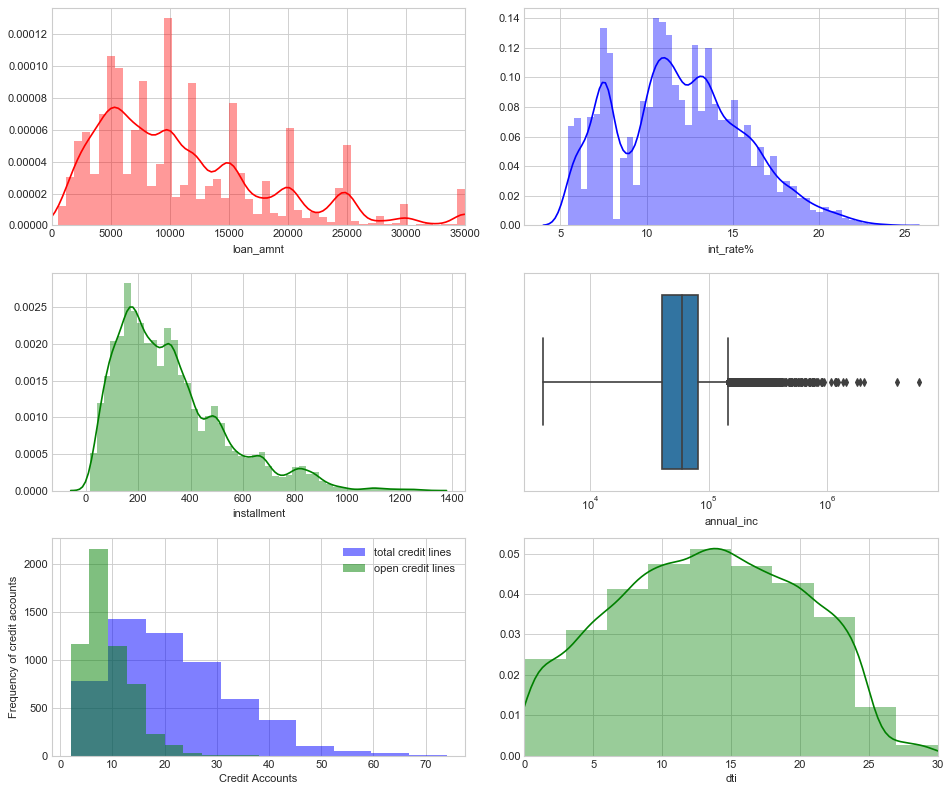

In [418]:
charged_off = loan.loc[loan['loan_status']=='Charged Off']

# adjust figure size
plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: loan_amnt
plt.subplot(3, 2, 1)
sns.distplot(loan['loan_amnt'], color='red')
plt.xlim([0, 35000])

# subplot 2: int_rate
plt.subplot(3, 2, 2)
sns.distplot(loan['int_rate%'], color='blue')

# subplot 3: installment
plt.subplot(3, 2, 3)
sns.distplot(loan['installment'], color='green')


# subplot 4: annual_inc
plt.subplot(3, 2, 4)
plt.xscale('log')
sns.boxplot('annual_inc', data=loan)


# subplot 5: credit accounts
plt.subplot(3, 2, 5)
charged_off['total_acc'].plot.hist(alpha=0.5,color='blue')
charged_off['open_acc'].plot.hist(alpha=0.5,color='green')   
plt.legend(['total credit lines','open credit lines'])
plt.xlabel('Credit Accounts')
plt.ylabel('Frequency of credit accounts')


# subplot 6: dti
plt.subplot(3, 2, 6)
sns.distplot(loan['dti'], color='green', bins=10)
plt.xlim([0, 30])

plt.tight_layout()
plt.show()

####  The above graphs offer the following insights

 -  <font color = blue> Loans with amount between 5000 and 15000 are of highest counts. </font>
 -  <font color = blue> More loans were accepted where interest rates were lower than when they were higher. </font>
 -  <font color = blue> Most of the loans accepted had installments upto 400. Very few had installments more than 1000.  </font>
 -  <font color = blue> Both the open credit lines and total credit lines have a decreasing trend in frequency as no of credit lines increase </font>
 -  <font color = blue> The frequency distribution of the variable dti roughly follows a bell curve with the highest frequency at 15 and lowest at 2 extremes.  </font> 
 -  <font color = blue> The annual income of the borrower is symmetrically distributed about its median. However there are quite a few top outlier values as well. We will be doing outlier treatment for this during bivariate analysis.  </font> 

### *** Univariate Analysis - Categorical Variable *** ###


#### ** `Finding the Frequency of Loan Requests based on different loan terms, grades, employess lengths, home ownerships, loan verification status, loan status,  loan purpose and  Number of derogatory public records` ** ####


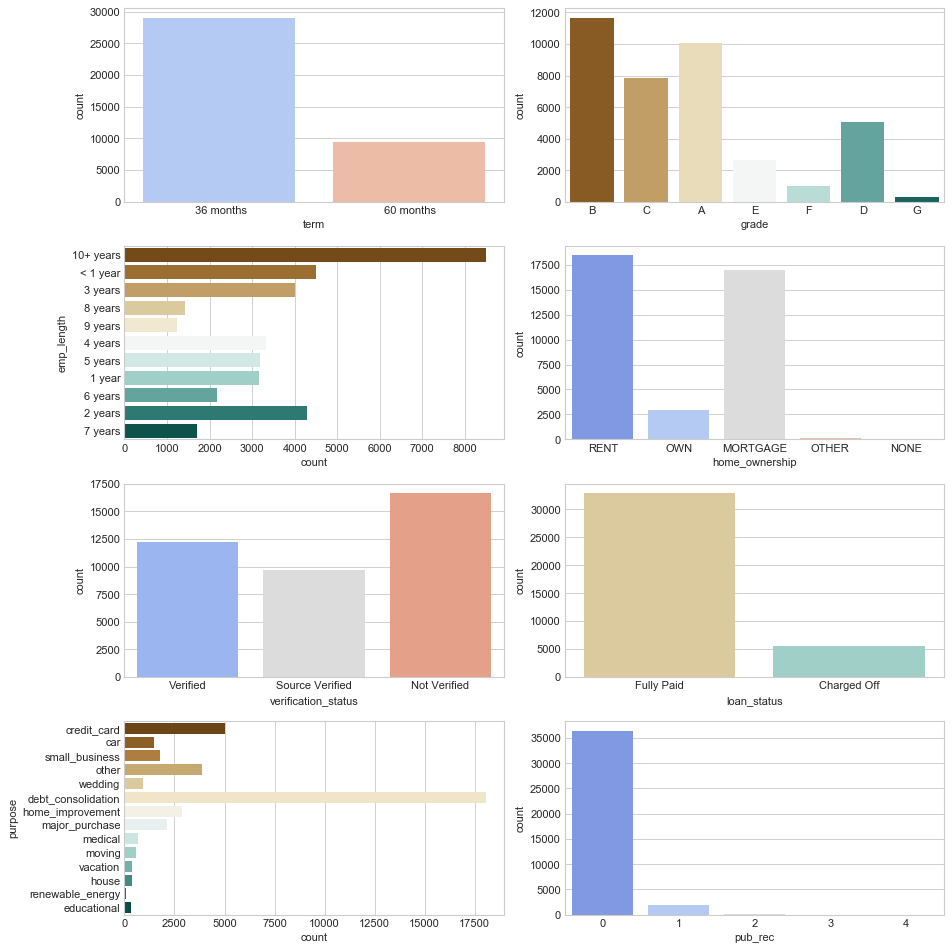

In [419]:
# adjust figure size
plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: Terms
plt.subplot(4, 2, 1)
sns.countplot(x='term', palette='coolwarm', data=loan)

# subplot 2: Grade
plt.subplot(4, 2, 2)
sns.countplot(x='grade', palette='BrBG', data=loan)

# subplot 3: Emp_length
plt.subplot(4, 2, 3)
sns.countplot(y='emp_length', palette='BrBG', data=loan)

# subplot 4: home_ownership
plt.subplot(4, 2, 4)
sns.countplot(x='home_ownership', palette='coolwarm', data=loan)

# subplot 5: verification_status
plt.subplot(4, 2, 5)
sns.countplot(x='verification_status', palette='coolwarm', data=loan)

# subplot 6: loan_status
plt.subplot(4, 2, 6)
sns.countplot(x='loan_status', palette='BrBG', data=loan)

# subplot 7: purpose
plt.subplot(4, 2, 7)
sns.countplot(y='purpose', palette='BrBG', data=loan)

# subplot 8: addr_state
plt.subplot(4, 2, 8)
sns.countplot(x='pub_rec', palette='coolwarm', data=loan)

plt.tight_layout()
plt.show()

####  The above graphs offer the following insights

 -  <font color = blue> Loans with term periods of 36 months were accepted in greater counts than those with term periods of 60 months </font>
 -  <font color = blue> Loans of grade B are the highest, followed by A, C and then the rest. </font>
 -  <font color = blue> Most of the loans belong to borrowers having employment length of either more than 10 yrs or 0-3 years  </font>
 -  <font color = blue> Rented homes are the most common type of home ownerships of loan borrowers followed by houses on mortgage and only a very few people requiring loans stay in their own houses.  </font> 
 -  <font color = blue> Out of of all the loans accepted, most of them are not verified, followed by verified and source verified.  </font> 
 -  <font color = blue> About 1/7th of all accepted loans are 'Charged off'. The rest are fully paid. </font> 
 -  <font color = blue> Debt consolidation appears to be the primary purpose for loan application Credit card loan.  </font> 
 -  <font color = blue> Very few amongst the borrowers of accepted loans have maximum one derogatory public record. Most of the rest have none. </font>  

### *** Segmented Univariate Analysis & Bivariate Analysis *** ###


#### ** `Finding percentage of charged_off loans from total loans for various values of loan purpose` ** ####

In [420]:
loan_purpose = pd.DataFrame(loan.groupby('purpose')['charged_off','fully_paid'].sum().reset_index())
loan_purpose

,purpose,charged_off,fully_paid
0,car,159,1338
1,credit_card,541,4484
2,debt_consolidation,2762,15281
3,educational,56,266
4,home_improvement,344,2526
5,house,59,308
6,major_purchase,221,1923
7,medical,105,574
8,moving,92,482
9,other,629,3223


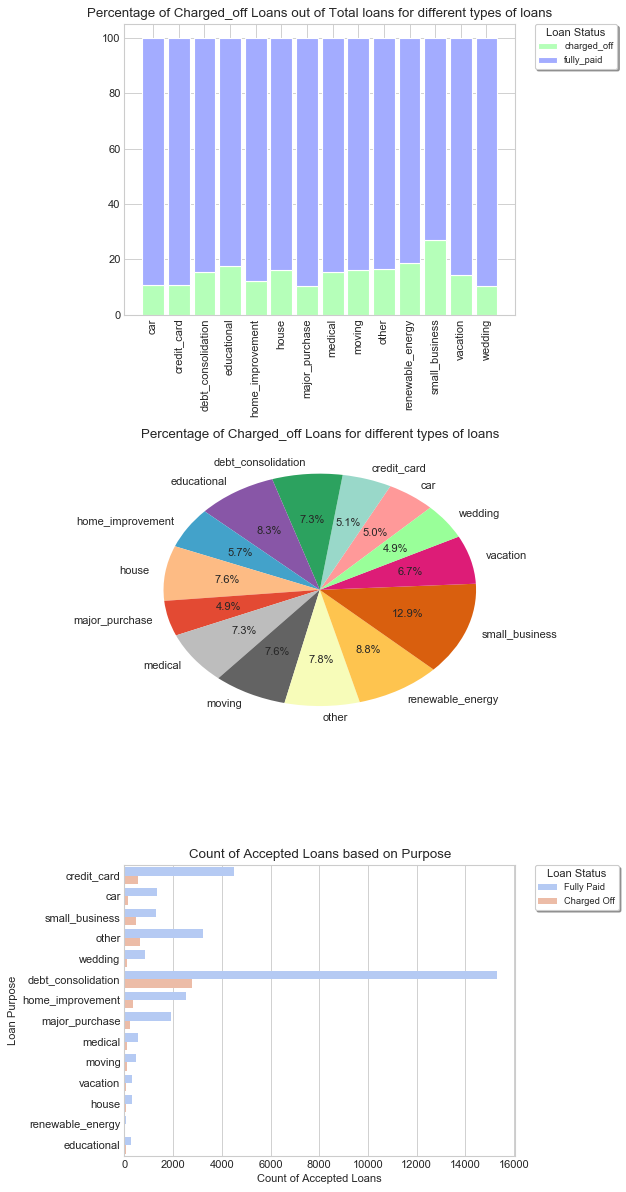

In [421]:
# From raw value to percentage
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
totals = [i+j for i,j in zip(loan_purpose['charged_off'], loan_purpose['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_purpose['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_purpose['fully_paid'], totals)]
names = list(loan_purpose['purpose'])

# plot
# adjust figure size
plt.figure(figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(3, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different types of loans")

# subplot 2: pie chart
plt.subplot(3, 1, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different types of loans")

# subplot 3: bar graph
plt.subplot(3, 1, 3)
sns.countplot(y='purpose', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Count of Accepted Loans')
plt.ylabel('Loan Purpose')
plt.title("Count of Accepted Loans based on Purpose")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Small business have highest % of charged off loans. </font>
 -  <font color = blue> Debt_consolidation has highest no of charged off loans. </font>

#### ** `Finding Percentage count of Fully-paid & Charged-off loans based on loan terms` ** ####


In [422]:
loan_term = pd.DataFrame(loan.groupby('term')['charged_off','fully_paid'].sum().reset_index())
loan_term

,term,charged_off,fully_paid
0,36 months,3214,25835
1,60 months,2397,7081


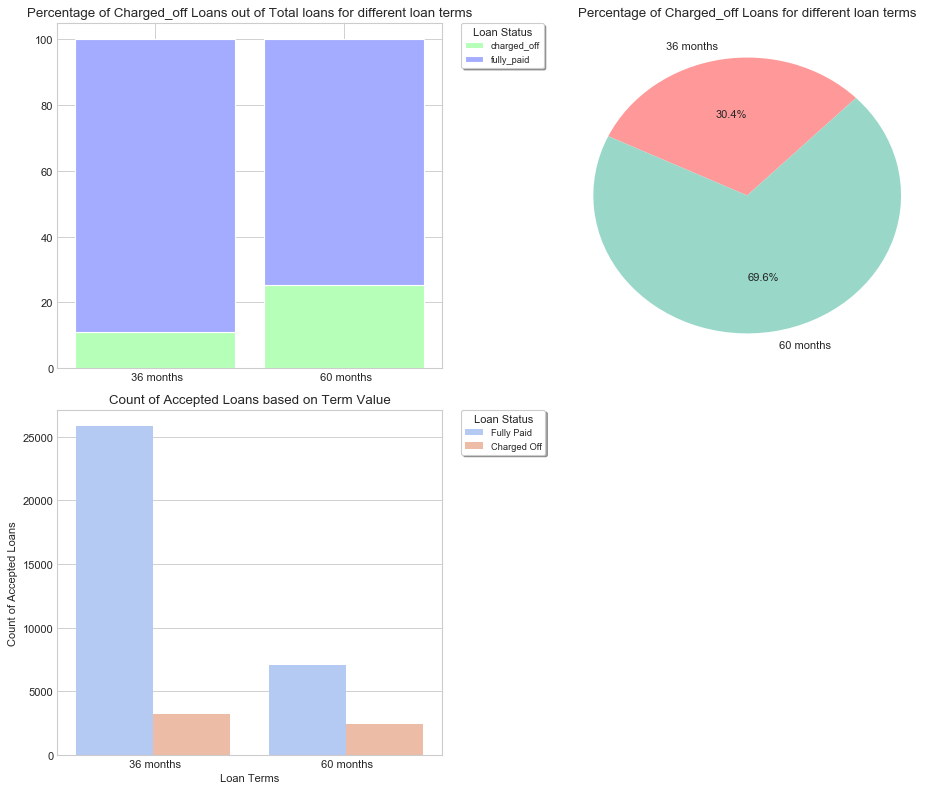

In [423]:
# From raw value to percentage
r = [0,1]
totals = [i+j for i,j in zip(loan_term['charged_off'], loan_term['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_term['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_term['fully_paid'], totals)]
names = list(loan_term['term'])

# plot
# adjust figure size
plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names)
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different loan terms")

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different loan terms")

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(x='term', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Loan Terms')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Term Value")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Loans with term=60 have more than double the the percentage of being charged off than those with term=36. </font>
 -  <font color = blue> There are more number of loans with term=36 that have become charged off than those with term=60. </font>

#### ** `Finding Percentage count of Fully-paid & Charged-off loans based on rate of interest` ** ####


In [424]:
loan_roi = pd.DataFrame(loan.groupby('interest_rate_slot')['charged_off','fully_paid'].sum().reset_index())
loan_roi

,interest_rate_slot,charged_off,fully_paid
0,Btwn 5 & 10,830,11486
1,Btwn 10 & 15,2702,15543
2,Btwn 15 & 20,1785,5414
3,Btwn 20 & 25,294,473


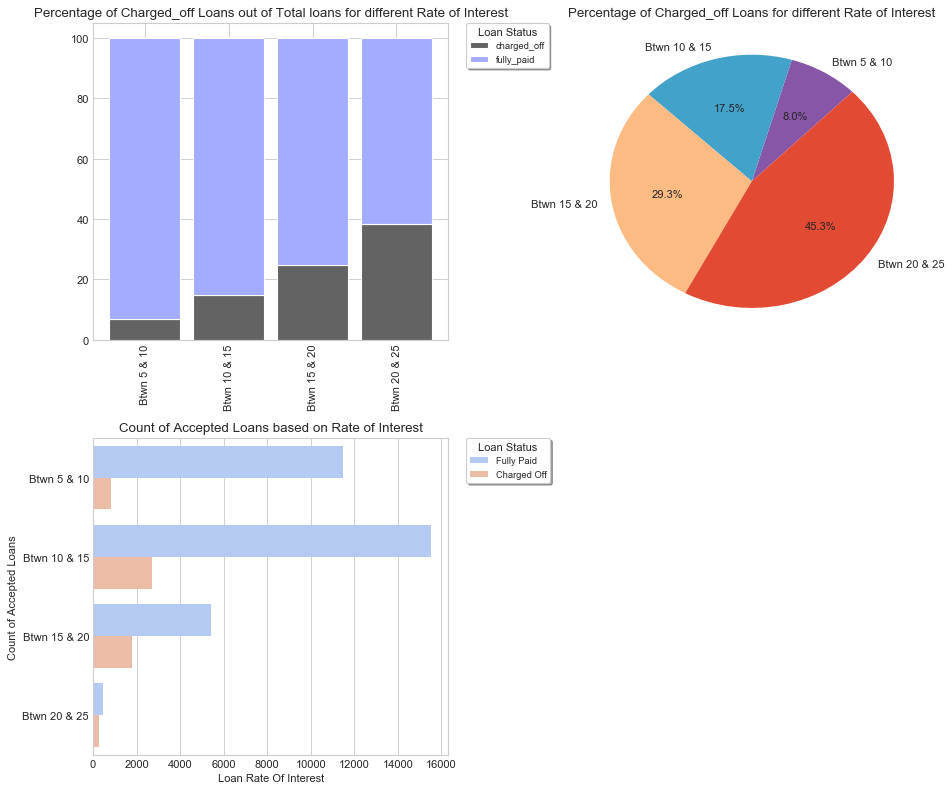

In [425]:
# From raw value to percentage
r = [0,1,2,3]
totals = [i+j for i,j in zip(loan_roi['charged_off'], loan_roi['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_roi['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_roi['fully_paid'], totals)]
names = list(loan_roi['interest_rate_slot'])

# plot
# adjust figure size
plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#636363', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Rate of Interest")

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Rate of Interest")

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(y='interest_rate_slot', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Loan Rate Of Interest')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Rate of Interest")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Higher the interest rate, higher is the percentage of charged off loans. </font>
 -  <font color = blue> Most no of charged off loans have interest rate between 10 to 15. </font>

#### ** `Finding Percentage count of Fully-paid & Charged-off loans based on loan installment` ** ####


In [426]:
loan_emi = pd.DataFrame(loan.groupby('emi_slot')['charged_off','fully_paid'].sum().reset_index())
loan_emi

,emi_slot,charged_off,fully_paid
0,Less Than 200,1803,11234
1,Btwn 200 & 400,2057,12665
2,Btwn 400 & 600,1047,5513
3,Btwn 600 & 800,433,2204
4,Btwn 800 & 1000,246,1090
5,Btwn 1000 & 1200,16,160
6,Btwn 1200 & 1400,9,50


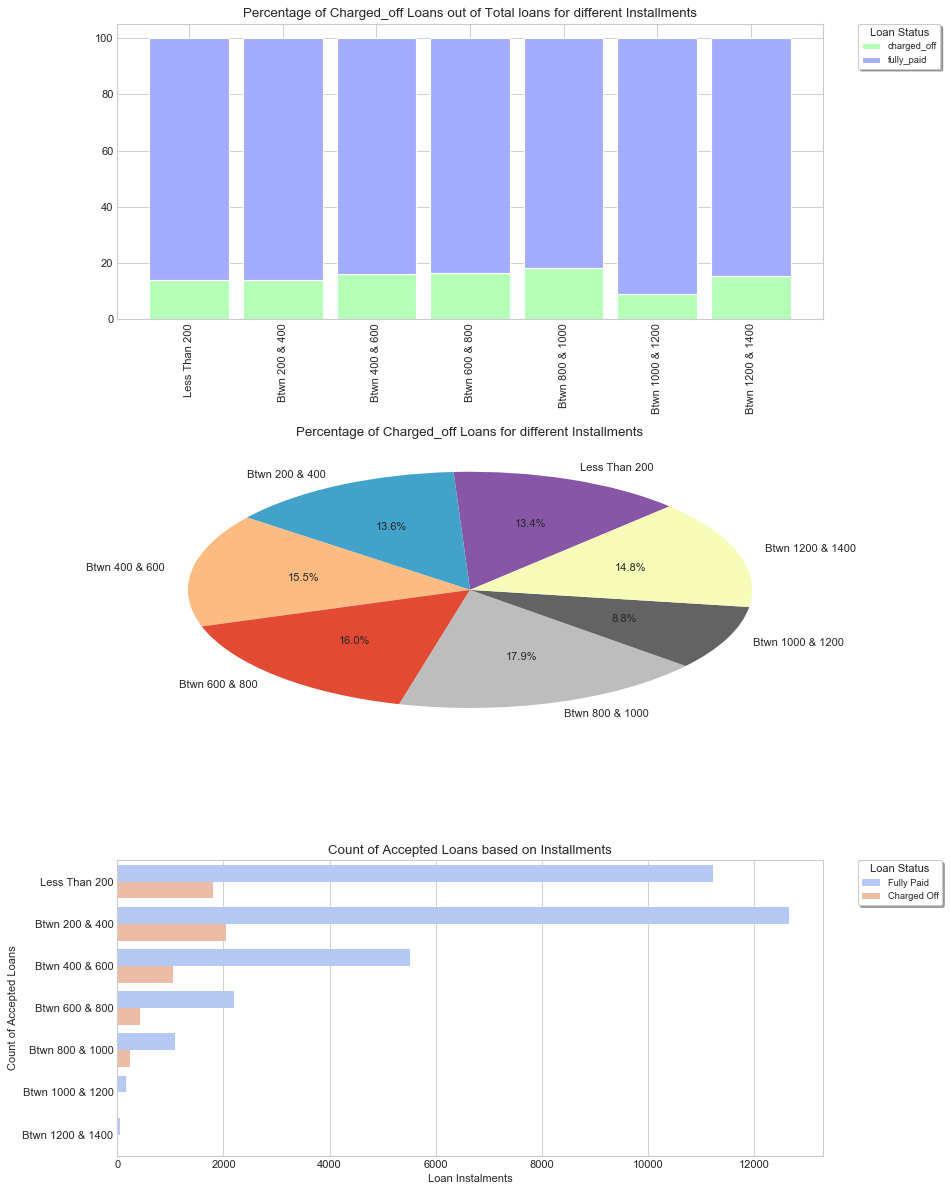

In [427]:
# From raw value to percentage
r = [0,1,2,3,4,5,6]
totals = [i+j for i,j in zip(loan_emi['charged_off'], loan_emi['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_emi['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_emi['fully_paid'], totals)]
names = list(loan_emi['emi_slot'])

# plot
# adjust figure size
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(3, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Installments")

# subplot 2: pie chart
plt.subplot(3, 1, 2)
pal = ["#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Installments")

# subplot 3: bar graph
plt.subplot(3, 1, 3)
sns.countplot(y='emi_slot', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Loan Instalments')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Installments")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Highest percentage of charged off loans occur between emi range 800-1000 and lowest between 1000-1200 </font>
 -  <font color = blue> highest count of charged off loans have occurred in emi range 200-400 </font>

#### ** `Finding Percentage count of Fully-paid & Charged-off loans based on loan grade` ** ####


In [428]:
loan_grade = pd.DataFrame(loan.groupby('grade')['charged_off','fully_paid'].sum().reset_index())
loan_grade

,grade,charged_off,fully_paid
0,A,602,9443
1,B,1425,10249
2,C,1343,6477
3,D,1115,3954
4,E,711,1941
5,F,316,654
6,G,99,198


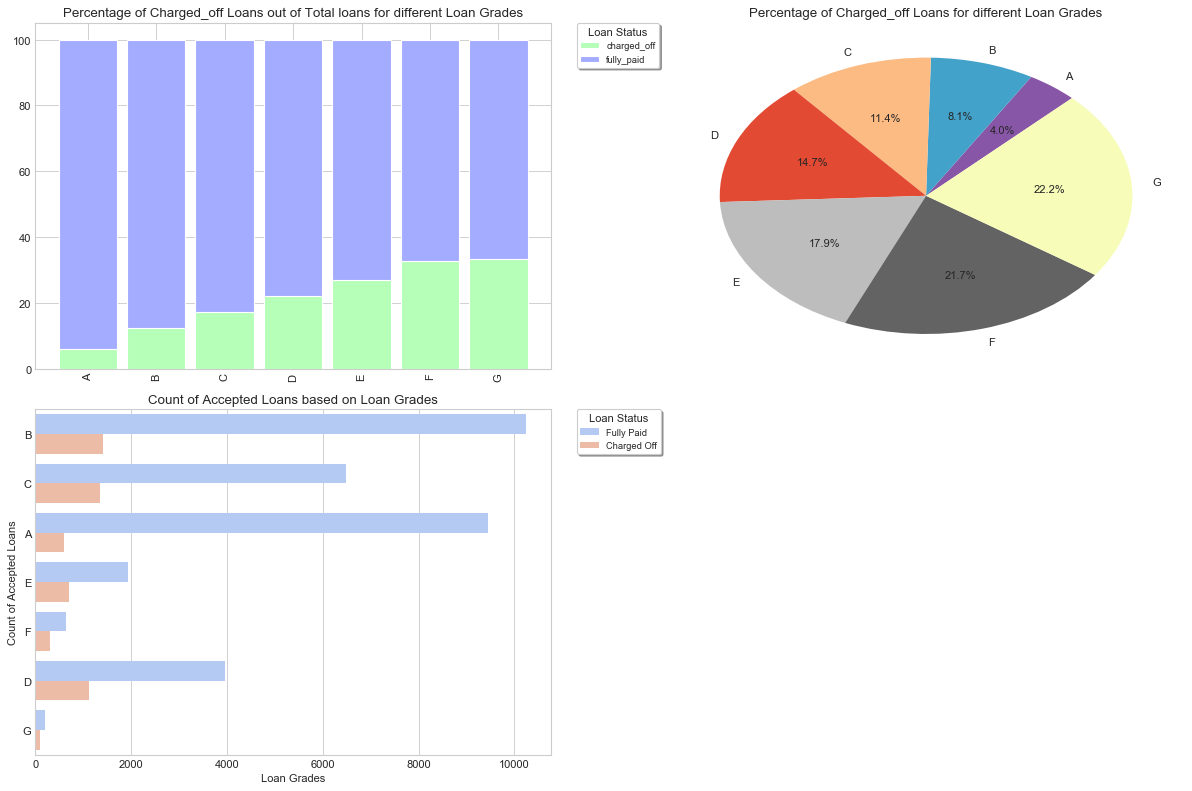

In [429]:
# From raw value to percentage
r = [0,1,2,3,4,5,6]
totals = [i+j for i,j in zip(loan_grade['charged_off'], loan_grade['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_grade['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_grade['fully_paid'], totals)]
names = list(loan_grade['grade'])

# plot
# adjust figure size
plt.figure(figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Loan Grades")

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Loan Grades")

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(y='grade', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Loan Grades')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Loan Grades")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Percentage of charged off loans increase from Grades A to G. </font>
 -  <font color = blue> Count of charged off loans is higher for grade B followed by C and D. </font>

#### ** `Finding count of Fully-paid & Charged-off loans based on loan sub-grade` ** ####


In [430]:
loan_grade_and_subgrade = pd.DataFrame(loan.groupby(['grade','sub_grade'])['charged_off','fully_paid'].sum())
loan_grade_and_subgrade

charged_off  fully_paid
grade sub_grade                         
A     A1                  30        1109
      A2                  74        1434
      A3                 103        1707
      A4                 178        2695
      A5                 217        2498
B     B1                 171        1626
      B2                 228        1773
      B3                 341        2484
      B4                 329        2107
      B5                 356        2259
C     C1                 336        1717
      C2                 318        1608
      C3                 270        1216
      C4                 212         993
      C5                 207         943
D     D1                 166         760
      D2                 270        1013
      D3                 255         857
      D4                 215         701
      D5                 209         623
E     E1                 198         524
      E2                 160         451
      E3                 119         394
      E4                 126         298
      E5                 108         274
F     F1                  91         213
      F2                  68         163
      F3                  51         123
      F4                  52          96
      F5                  54          59
G     G1                  30          63
      G2                  27          49
      G3                  19          26
      G4                  13          41
      G5                  10          19

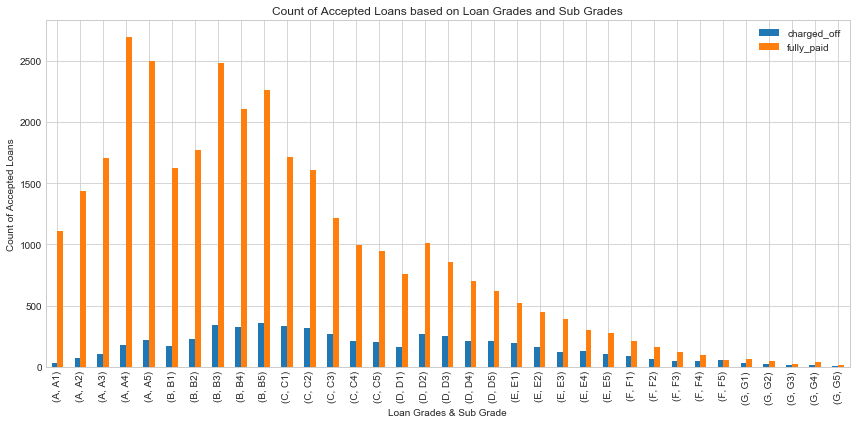

In [431]:
# adjust figure size
loan_grade_and_subgrade.plot.bar(figsize=(12,6))
plt.xlabel('Loan Grades & Sub Grade')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Loan Grades and Sub Grades")

plt.tight_layout()
plt.show()

####  No specific trends are observed from the loan Subgrade


#### ** `Finding percentage of charged_off loans from total loans for various values of Employment Length` ** ####

In [432]:
loan_emp_length = pd.DataFrame(loan.groupby('emp_length')['charged_off','fully_paid'].sum().reset_index())
loan_emp_length

,emp_length,charged_off,fully_paid
0,1 year,453,2710
1,10+ years,1330,7157
2,2 years,566,3720
3,3 years,555,3453
4,4 years,460,2875
5,5 years,457,2733
6,6 years,305,1860
7,7 years,263,1445
8,8 years,202,1231
9,9 years,158,1068


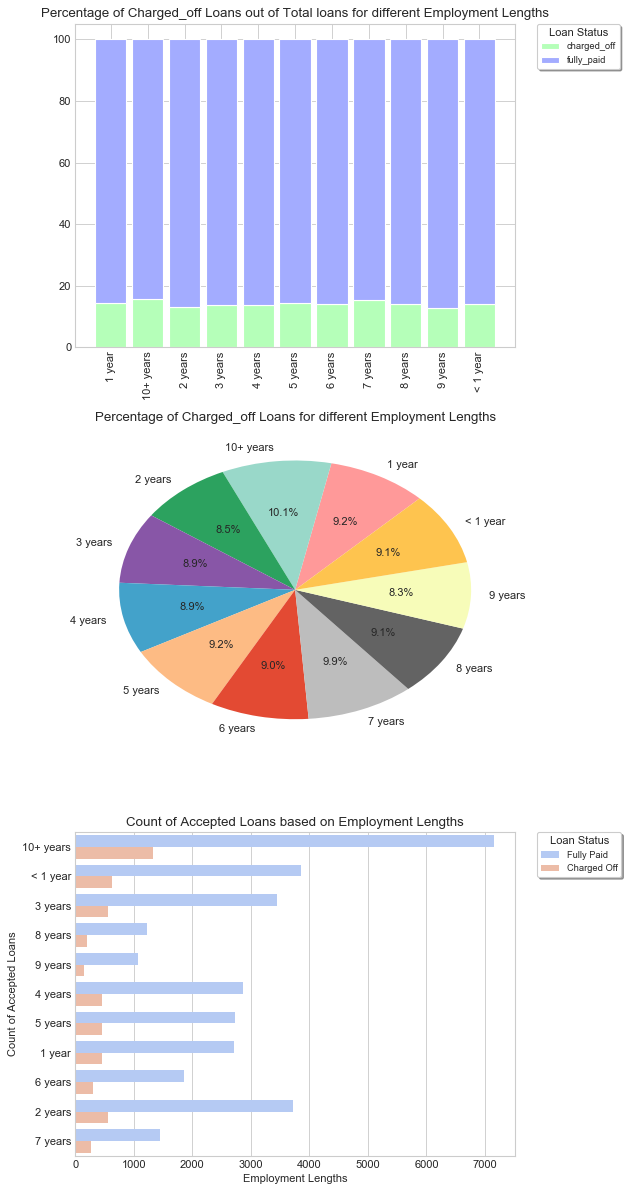

In [433]:
# From raw value to percentage
r = [0,1,2,3,4,5,6,7,8,9,10]
totals = [i+j for i,j in zip(loan_emp_length['charged_off'], loan_emp_length['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_emp_length['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_emp_length['fully_paid'], totals)]
names = list(loan_emp_length['emp_length'])

# plot
# adjust figure size
plt.figure(figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(3, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Employment Lengths")

# subplot 2: pie chart
plt.subplot(3, 1, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Employment Lengths")

# subplot 3: bar graph
plt.subplot(3, 1, 3)
sns.countplot(y='emp_length', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Employment Lengths')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Employment Lengths")

# Show graphic
plt.tight_layout()
plt.show()


####  No specific trends are observed from analyzing the Employment Length


#### ** `Finding percentage of charged_off loans from total loans for various values of Home Ownership` ** ####

In [434]:
loan_home_ownership = pd.DataFrame(loan.groupby('home_ownership')['charged_off','fully_paid'].sum().reset_index())
loan_home_ownership

,home_ownership,charged_off,fully_paid
0,MORTGAGE,2323,14687
1,NONE,0,3
2,OTHER,18,78
3,OWN,441,2529
4,RENT,2829,15619


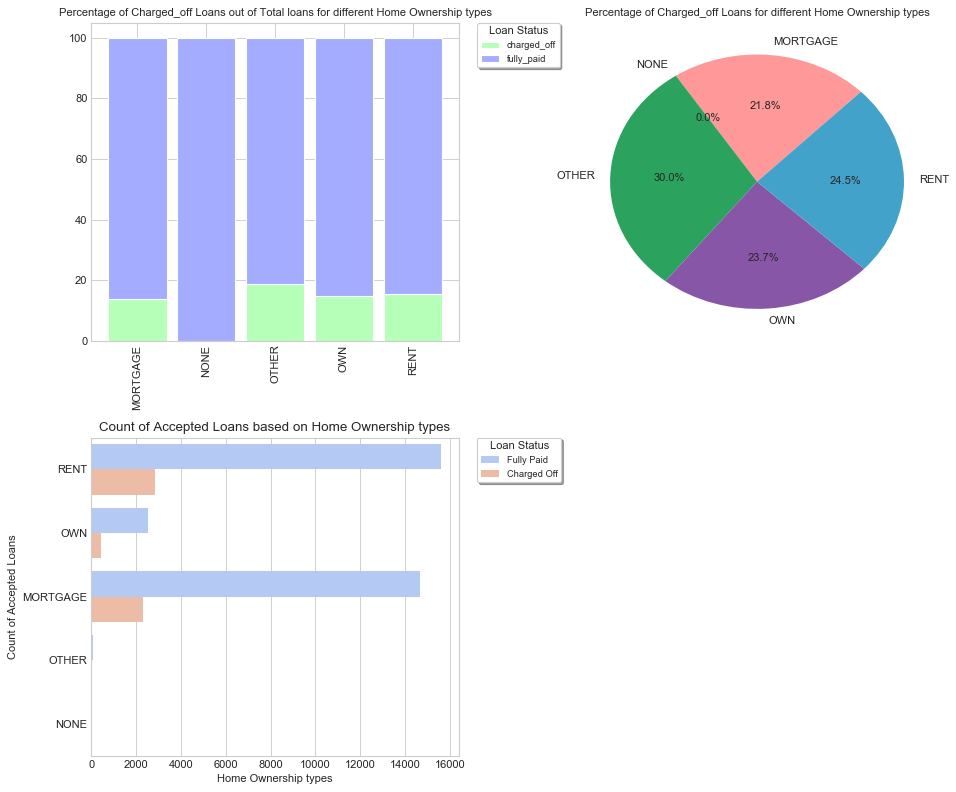

In [435]:
# From raw value to percentage
r = [0,1,2,3,4]
totals = [i+j for i,j in zip(loan_home_ownership['charged_off'], loan_home_ownership['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_home_ownership['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_home_ownership['fully_paid'], totals)]
names = list(loan_home_ownership['home_ownership'])

# plot
# adjust figure size
plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Home Ownership types", fontsize='medium')

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Home Ownership types", fontsize='medium')

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(y='home_ownership', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Home Ownership types')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Home Ownership types")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Percentage of charged off loans is slightly more amongst people with home_wnership type ='Other'. </font>
 -  <font color = blue> Count of charged off loans is higher amongst boorowers with house-mortgage and house-rent. </font>

#### ** `Finding percentage of charged_off loans from total loans for various values of Verification_status` ** ####

In [436]:
loan_verification_status = pd.DataFrame(loan.groupby('verification_status')['charged_off','fully_paid'].sum().reset_index())
loan_verification_status

,verification_status,charged_off,fully_paid
0,Not Verified,2135,14530
1,Source Verified,1431,8235
2,Verified,2045,10151


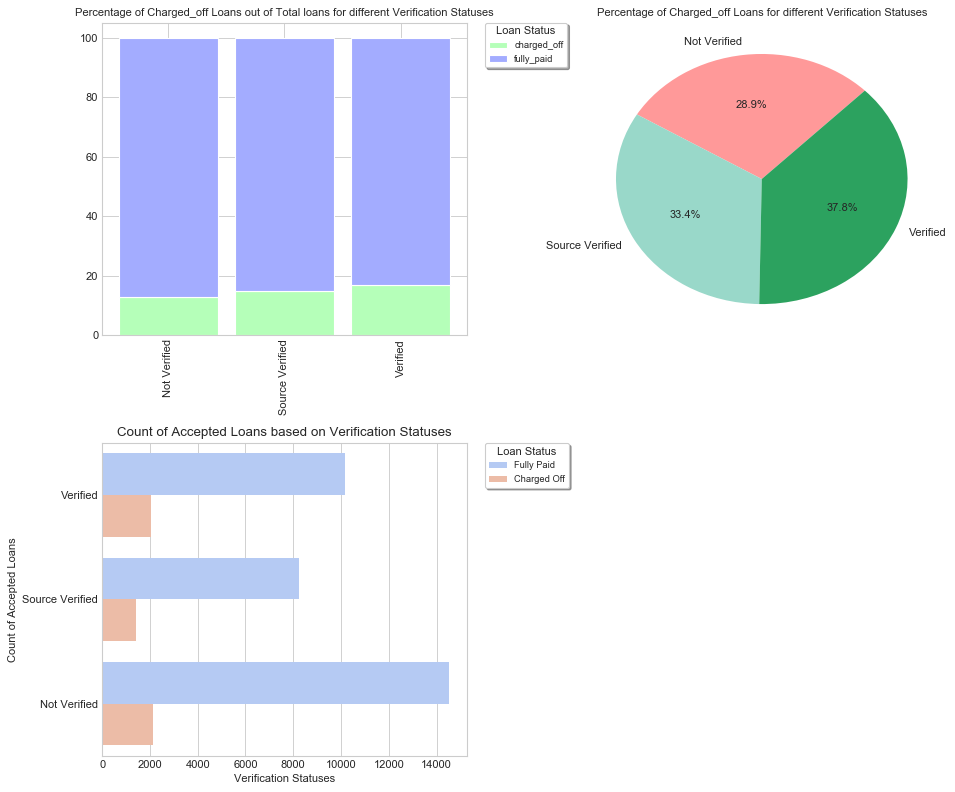

In [437]:
# From raw value to percentage
r = [0,1,2]
totals = [i+j for i,j in zip(loan_verification_status['charged_off'], loan_verification_status['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_verification_status['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_verification_status['fully_paid'], totals)]
names = list(loan_verification_status['verification_status'])

# plot
# adjust figure size
plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Verification Statuses", fontsize='medium')

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Verification Statuses", fontsize='medium')

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(y='verification_status', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Verification Statuses')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Verification Statuses")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Percentage of charged off loans is slightly more for verification status = ‘Verified’ followed by ‘Source verified’ and ‘Not verified’. </font>

#### ** `Finding percentage of charged_off loans from total loans for various States` ** ####

In [438]:
loan_addr_state = pd.DataFrame(loan.groupby('addr_state')['charged_off','fully_paid'].sum().reset_index())
loan_addr_state

,addr_state,charged_off,fully_paid
0,AK,15,63
1,AL,53,381
2,AR,27,207
3,AZ,122,724
4,CA,1124,5818
5,CO,98,668
6,CT,94,632
7,DC,15,194
8,DE,11,101
9,FL,503,2277


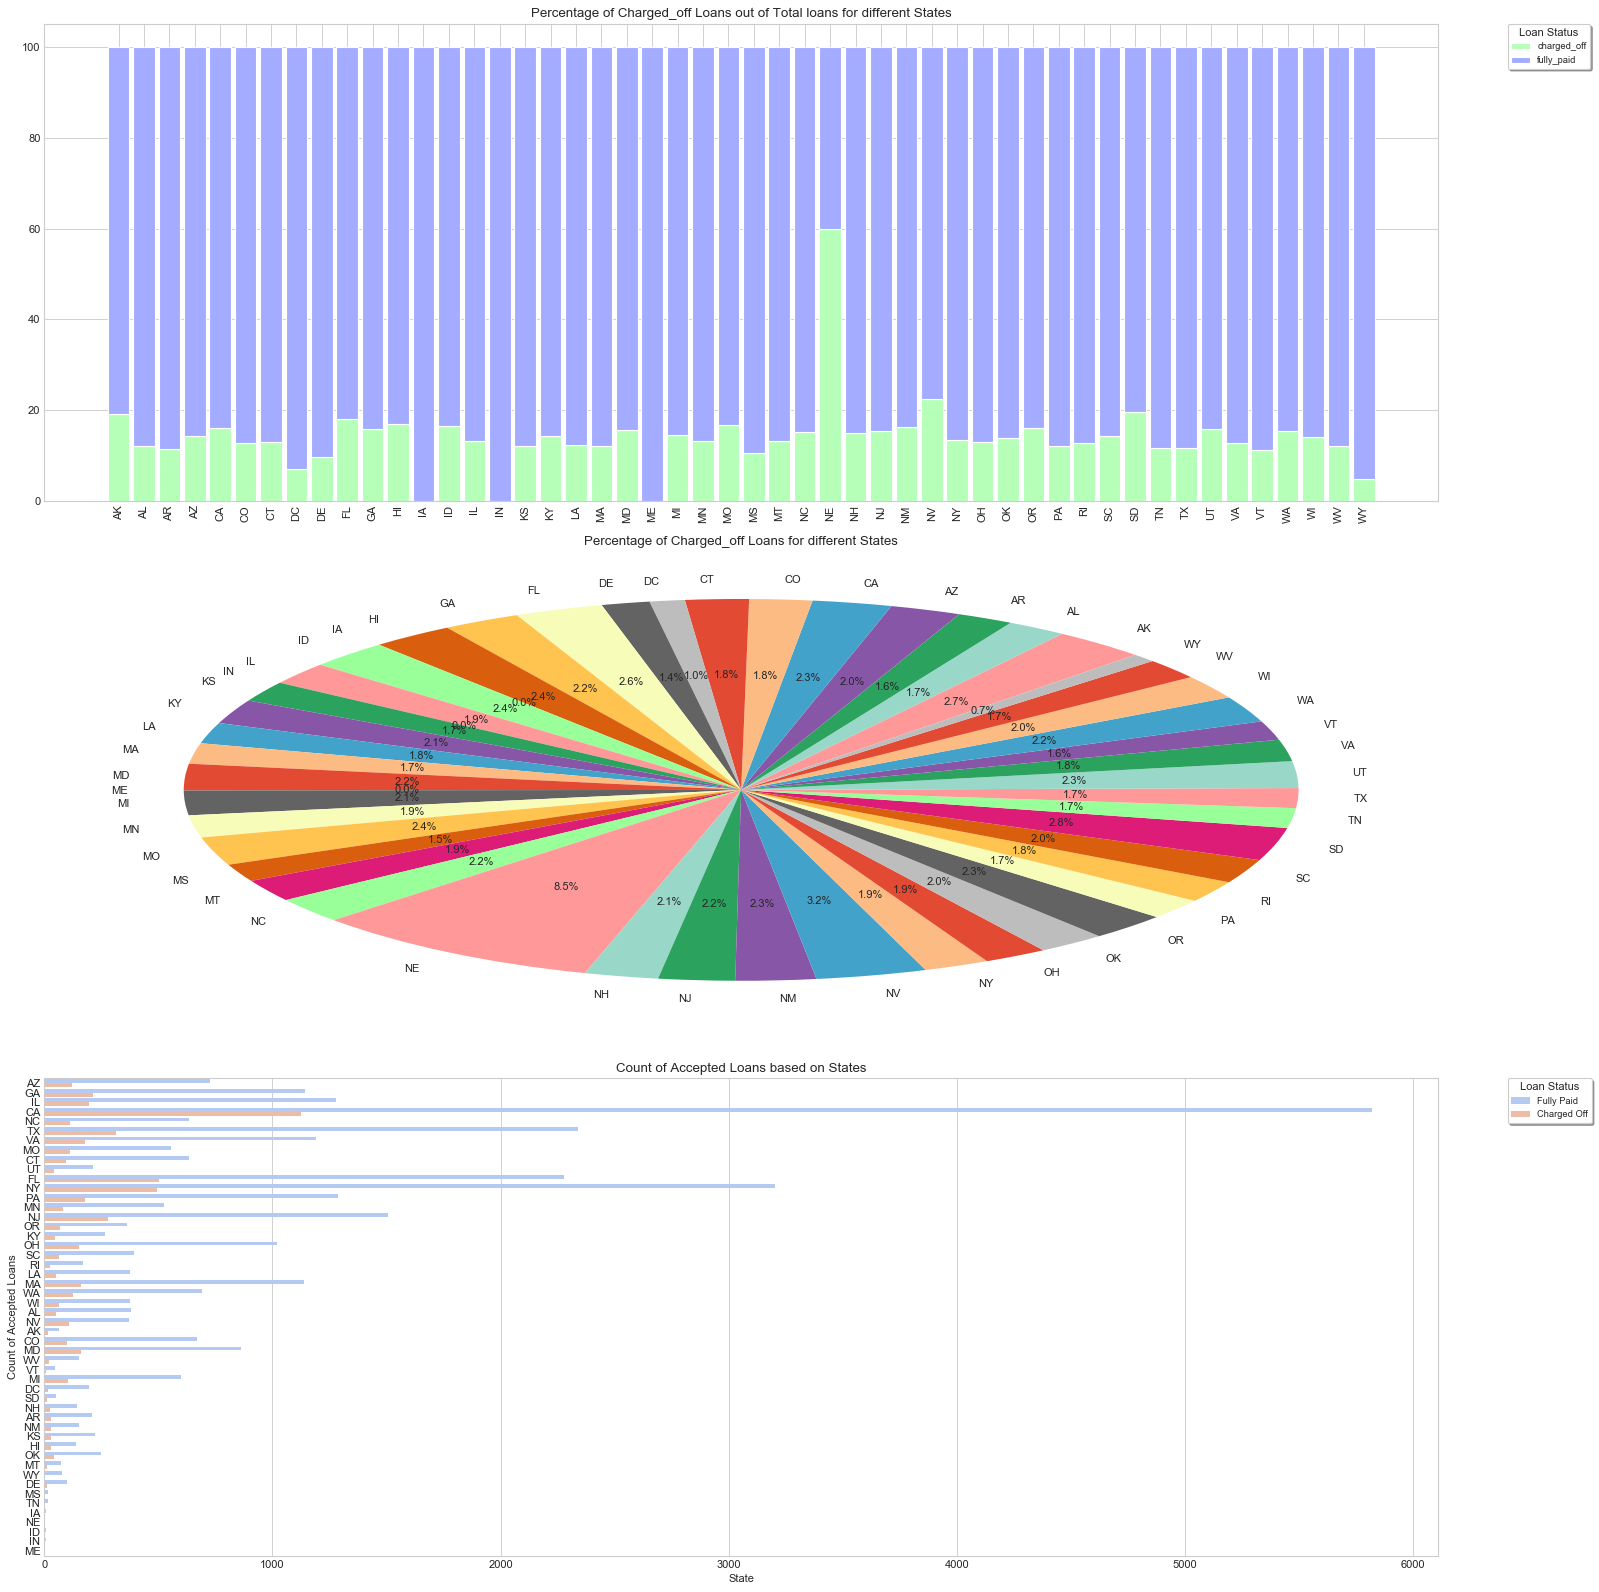

In [439]:
# From raw value to percentage
r = list(loan_addr_state.index)
totals = [i+j for i,j in zip(loan_addr_state['charged_off'], loan_addr_state['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_addr_state['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_addr_state['fully_paid'], totals)]
names = list(loan_addr_state['addr_state'])

# plot
# adjust figure size
plt.figure(figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(3, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different States")

# subplot 2: pie chart
plt.subplot(3, 1, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different States")

# subplot 3: bar graph
plt.subplot(3, 1, 3)
sns.countplot(y='addr_state', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('State')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on States")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Percentage of charged off loans is highest in the state NE . </font>
 -  <font color = blue> The count of charged off loans is most in the state CA followed by NY, FL, TX and NJ. </font> 

#### ** `Finding percentage of charged_off loans from total loans for various values of DTI` ** ####

In [440]:
loan_dti_slot = pd.DataFrame(loan.groupby('dti_slot')['charged_off','fully_paid'].sum().reset_index())
loan_dti_slot

,dti_slot,charged_off,fully_paid
0,Less Than 5,623,4424
1,Btwn 5 & 10,1003,6862
2,Btwn 10 & 15,1396,8224
3,Btwn 15 & 20,1387,7413
4,Btwn 20 & 25,1115,5457
5,Btwn 25 & 30,87,536


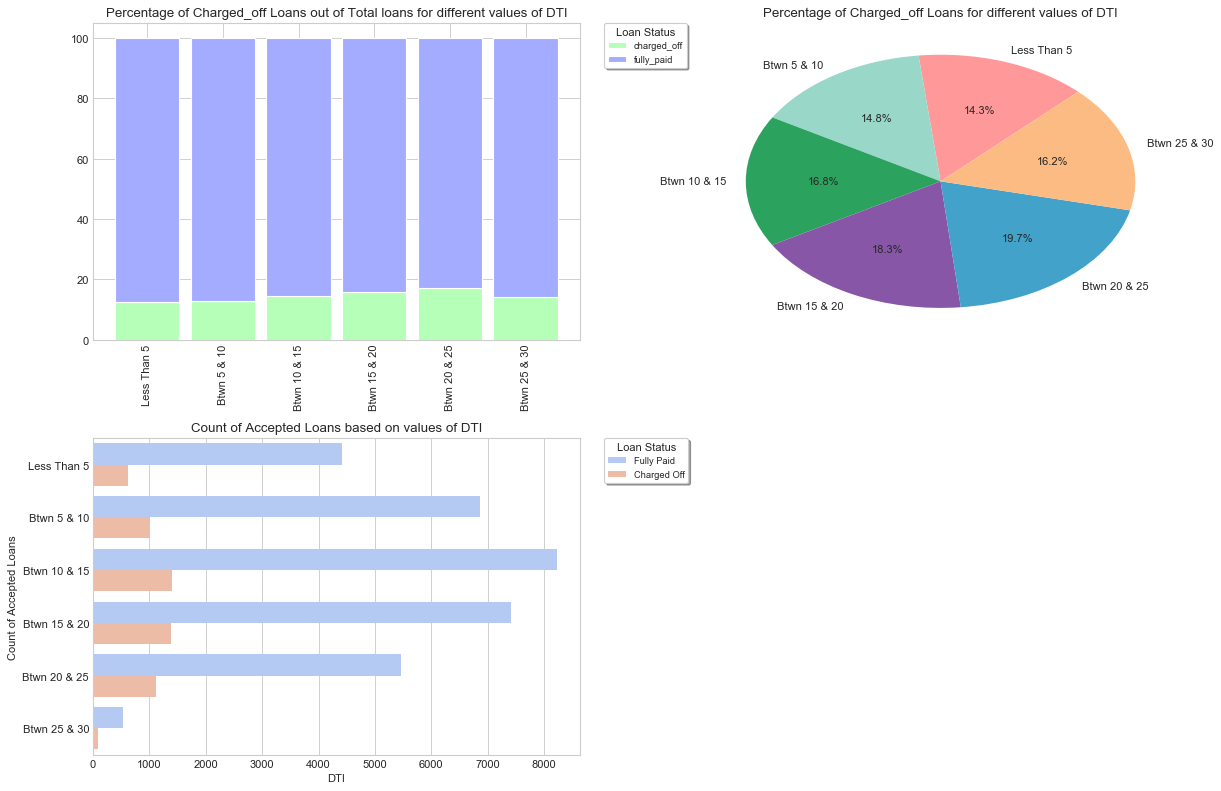

In [441]:
# From raw value to percentage
r = list(loan_dti_slot.index)
totals = [i+j for i,j in zip(loan_dti_slot['charged_off'], loan_dti_slot['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_dti_slot['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_dti_slot['fully_paid'], totals)]
names = list(loan_dti_slot['dti_slot'])

# plot
# adjust figure size
plt.figure(figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different values of DTI")

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different values of DTI")

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(y='dti_slot', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('DTI')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on values of DTI")

# Show graphic
plt.tight_layout()
plt.show()


####  No specific trends are observed from analyzing the values of DTI


#### ** `Finding percentage of charged_off loans from total loans for various values of Pub_Rec` ** ####

In [442]:
loan_pub_rec = pd.DataFrame(loan.groupby('pub_rec')['charged_off','fully_paid'].sum().reset_index())
loan_pub_rec

,pub_rec,charged_off,fully_paid
0,0,5144,31315
1,1,457,1554
2,2,10,38
3,3,0,7
4,4,0,2


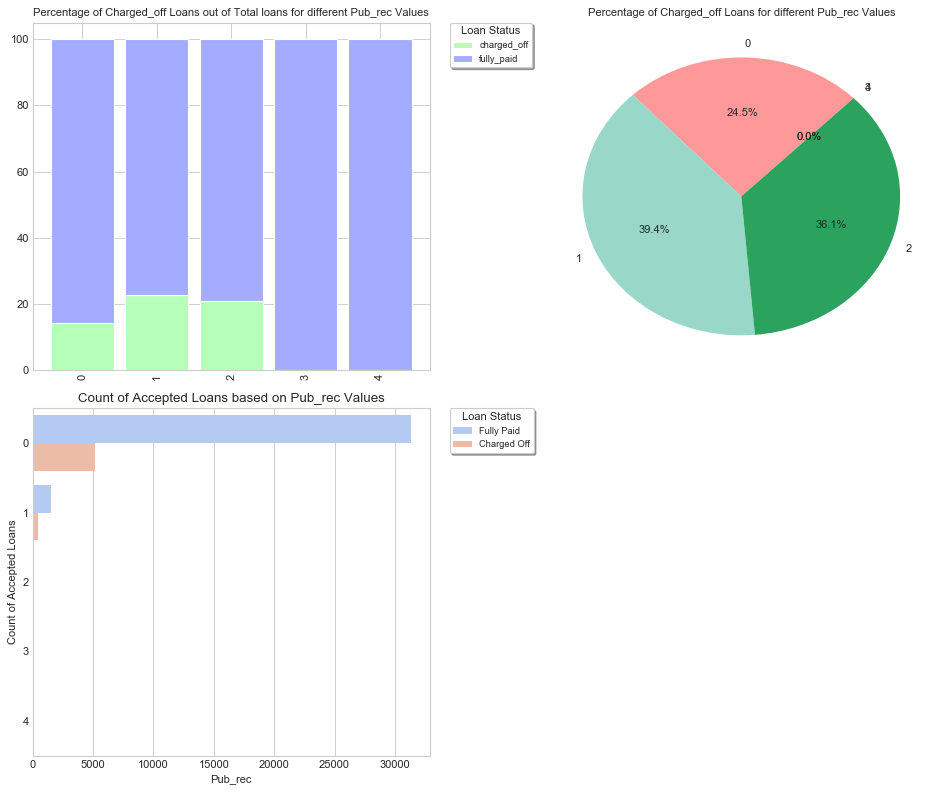

In [443]:
# From raw value to percentage
r = list(loan_pub_rec.index)
totals = [i+j for i,j in zip(loan_pub_rec['charged_off'], loan_pub_rec['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_pub_rec['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_pub_rec['fully_paid'], totals)]
names = list(loan_pub_rec['pub_rec'])

# plot
# adjust figure size
plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Pub_rec Values", fontsize='medium')

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Pub_rec Values", fontsize='medium')

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(y='pub_rec', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Pub_rec')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Pub_rec Values")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Percentage of charged off loans is highest for pub_rec value 1, followed by 2 and 0. </font>

#### ** `Finding percentage of charged_off loans from total loans for various values of Pub_Rec_Bankruptcies` ** ####

In [444]:
loan_pub_rec_bankruptcies = pd.DataFrame(loan.groupby('pub_rec_bankruptcies')['charged_off','fully_paid'].sum().reset_index())
loan_pub_rec_bankruptcies

,pub_rec_bankruptcies,charged_off,fully_paid
0,0.0,5125,31064
1,1.0,366,1270
2,2.0,2,3


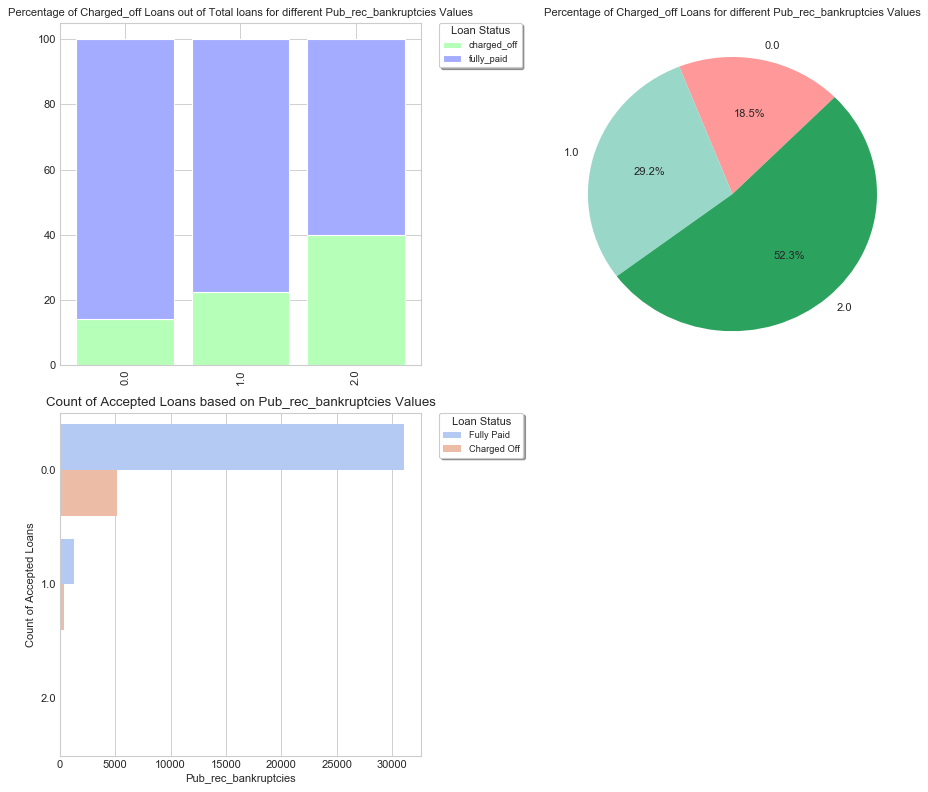

In [445]:
# From raw value to percentage
r = list(loan_pub_rec_bankruptcies.index)
totals = [i+j for i,j in zip(loan_pub_rec_bankruptcies['charged_off'], loan_pub_rec_bankruptcies['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_pub_rec_bankruptcies['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_pub_rec_bankruptcies['fully_paid'], totals)]
names = list(loan_pub_rec_bankruptcies['pub_rec_bankruptcies'])

# plot
# adjust figure size
plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Pub_rec_bankruptcies Values", fontsize='medium')

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Pub_rec_bankruptcies Values", fontsize='medium')

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(y='pub_rec_bankruptcies', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Pub_rec_bankruptcies')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Pub_rec_bankruptcies Values")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Percentage of charged off loans gradually increase with increase in the value of Pub_rec_bankruptcies </font>

#### ** `Finding percentage of charged_off loans from total loans for different segments of Revolving Utilizations` ** ####

In [446]:
loan_revol_util_slot = pd.DataFrame(loan.groupby('revol_util_slot')['charged_off','fully_paid'].sum().reset_index())
loan_revol_util_slot

,revol_util_slot,charged_off,fully_paid
0,Btwn 0 & 10,437,3998
1,Btwn 10 & 20,333,2992
2,Btwn 20 & 30,414,3290
3,Btwn 30 & 40,501,3500
4,Btwn 40 & 50,606,3618
5,Btwn 50 & 60,630,3554
6,Btwn 60 & 70,659,3458
7,Btwn 70 & 80,697,3200
8,Btwn 80 & 90,678,2887
9,Btwn 90 & 100,656,2419


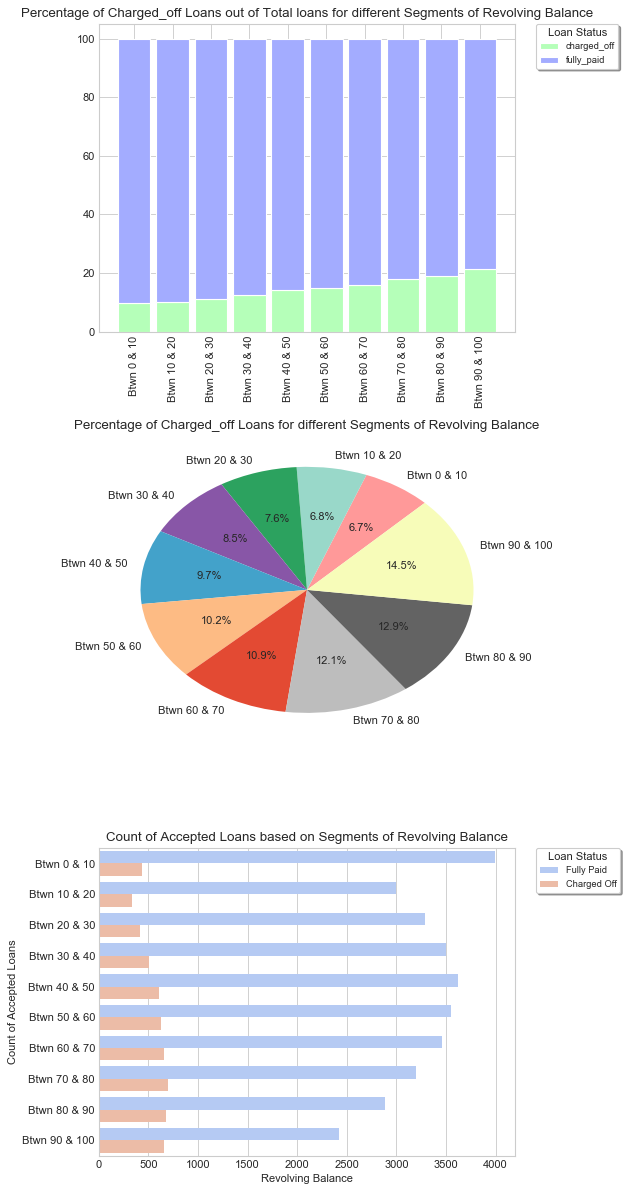

In [447]:
# From raw value to percentage
r = list(loan_revol_util_slot.index)
totals = [i+j for i,j in zip(loan_revol_util_slot['charged_off'], loan_revol_util_slot['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_revol_util_slot['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_revol_util_slot['fully_paid'], totals)]
names = list(loan_revol_util_slot['revol_util_slot'])

# plot
# adjust figure size
plt.figure(figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(3, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Segments of Revolving Balance")

# subplot 2: pie chart
plt.subplot(3, 1, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different Segments of Revolving Balance")

# subplot 3: bar graph
plt.subplot(3, 1, 3)
sns.countplot(y='revol_util_slot', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Revolving Balance')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Segments of Revolving Balance")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Percentage of charged off loans gradually increase with increase in the value of revol_util </font>

#### ** `Finding percentage of charged_off loans from total loans for different values of Open Credit Lines` ** ####

In [448]:
loan_open_acc_slot = pd.DataFrame(loan.groupby('open_acc_slot')['charged_off','fully_paid'].sum().reset_index())
loan_open_acc_slot

,open_acc_slot,charged_off,fully_paid
0,Less Than 5,1161,6283
1,Btwn 5 & 10,2626,15632
2,Btwn 10 & 15,1331,7959
3,Btwn 15 & 20,376,2429
4,Above 20,117,613


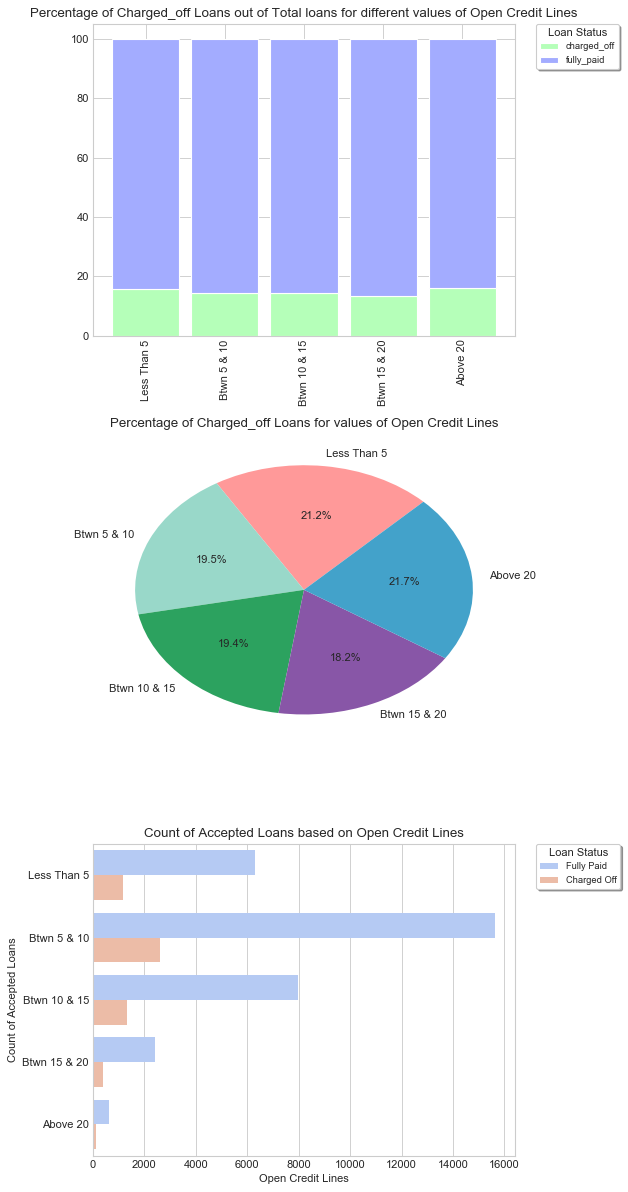

In [449]:
# From raw value to percentage
r = list(loan_open_acc_slot.index)
totals = [i+j for i,j in zip(loan_open_acc_slot['charged_off'], loan_open_acc_slot['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_open_acc_slot['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_open_acc_slot['fully_paid'], totals)]
names = list(loan_open_acc_slot['open_acc_slot'])

# plot
# adjust figure size
plt.figure(figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(3, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different values of Open Credit Lines")

# subplot 2: pie chart
plt.subplot(3, 1, 2)
pal = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for values of Open Credit Lines")

# subplot 3: bar graph
plt.subplot(3, 1, 3)
sns.countplot(y='open_acc_slot', hue ='loan_status', palette='coolwarm', data=loan)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Open Credit Lines')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Open Credit Lines")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> Count of charged off loans is highest when no of Open Credit Lines is between 5 & 10 </font>

#### ** `Finding Relationship of Loan Amt with Loan Status` ** ####


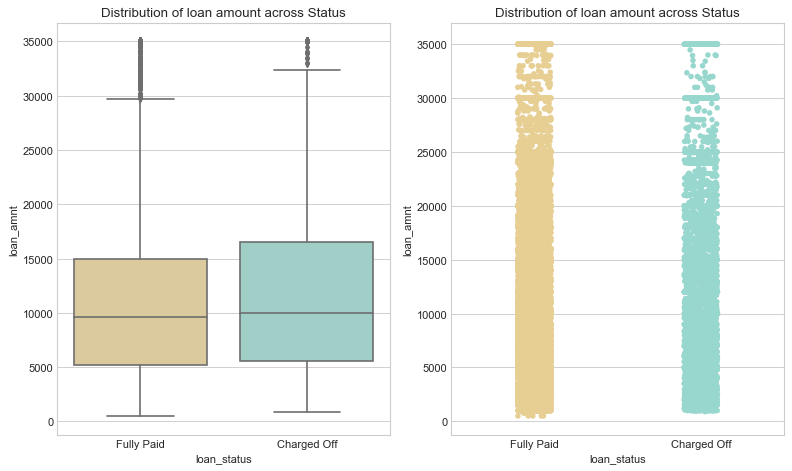

In [450]:
# adjust figure size
plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid")

# subplot 1: box_plot
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='loan_amnt', palette='BrBG', data=loan)
plt.title("Distribution of loan amount across Status")

# subplot 1: strip plot
plt.subplot(1, 2, 2)
sns.stripplot(x="loan_status", y="loan_amnt", data=loan, palette='BrBG', jitter=True)
plt.title("Distribution of loan amount across Status")

plt.tight_layout()
plt.show()

####  The above graphs offer the following insights

 -  <font color = blue> Distribution of Charged of loans is more between loan amount range 5000 and 17000. </font>
 -  <font color = blue> Frequency of Charged off loans decreases with increase in loan amount. </font>

#### ** `Finding Relationship of Annual_Income with Loan Status` ** ####


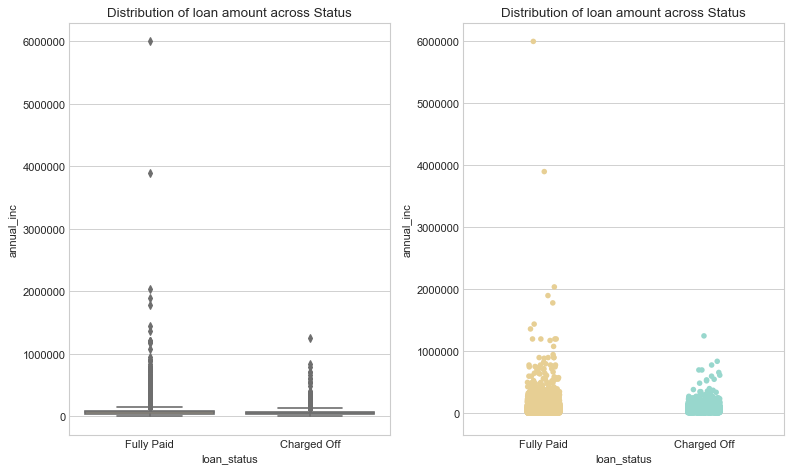

In [451]:
# adjust figure size
plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid")

# subplot 1: box_plot
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='annual_inc', palette='BrBG', data=loan)
plt.title("Distribution of loan amount across Status")

# subplot 1: strip plot
plt.subplot(1, 2, 2)
sns.stripplot(x="loan_status", y="annual_inc", data=loan, palette='BrBG', jitter=True)
plt.title("Distribution of loan amount across Status")

plt.tight_layout()
plt.show()

•   From the distribution we see that there are quite a few outliers for the annual income variable. 

    Next we will try to remove these outlier values

#### ** `Removing Outlier values from Annual Income column` ** ####


In [452]:
# Creating a copy of the loan dataframe. 
# Outlier treatment will be done to this new dataframe to keep the original df intact

loan_df = loan

# Calculating the Inter Quartile Range for Annual Income column
Q1 = loan_df['annual_inc'].quantile(0.25)
Q3 = loan_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

42000.0


In [453]:
# Detecting the outliers with the help of IQR
print(loan_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(loan_df['annual_inc'] > (Q3 + 1.5 * IQR))

0        False
1        False
2        False
3        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
         ...  
39687    False
39688    False
39689    False
39690    False
39691    False
39692    False
39693    False
39694    False
39695    False
39696    False
39697    False
39698    False
39699    False
39700    False
39701    False
39702    False
39703    False
39704    False
39705    False
39706    False
39707    False
39708    False
39709    False
39710    False
39711    False
39712    False
39713    False
39714    False
39715    False
39716    False
Name: annual_inc, Length: 38527, dtype: bool


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [454]:
# Removing the outliers from the dataset
loan_df = loan_df[~((loan_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(loan_df['annual_inc'] > (Q3 + 1.5 * IQR)))]
loan_df.shape

(36766, 50)

#### ** `Replotting Annual_Income Distribution after outlier removal` ** ####


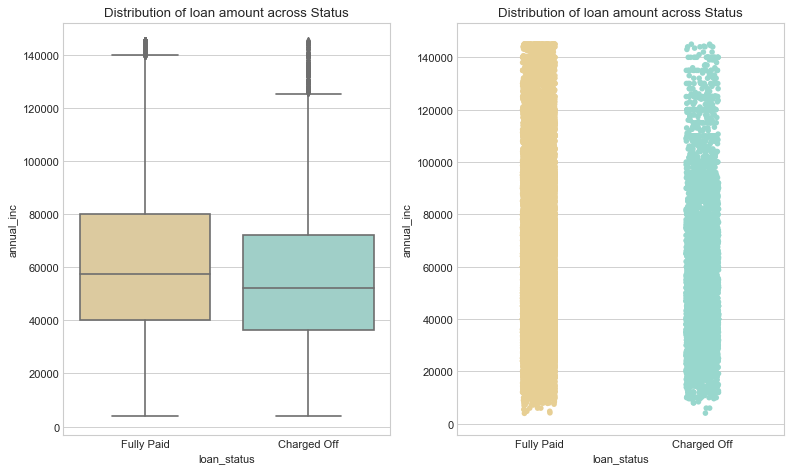

In [455]:
# adjust figure size
plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid")

# subplot 1: box_plot
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='annual_inc', palette='BrBG', data=loan_df)
plt.title("Distribution of loan amount across Status")

# subplot 1: strip plot
plt.subplot(1, 2, 2)
sns.stripplot(x="loan_status", y="annual_inc", data=loan_df, palette='BrBG', jitter=True)
plt.title("Distribution of loan amount across Status")

plt.tight_layout()
plt.show()

•   From the distribution we see that the frequency of charged off loans is concentrated mostly between annual income 40000 and 60000

#### ** `Creating new column 'annual_income_slot' by segmenting the annual_income column` ** ####

In [456]:
# Segmenting the monthly installments into different slots

def inc_slot(loan_df,cut_points,label_names):
    column_index = loan.columns.get_loc('annual_inc') + 1
    loan_df.insert(loc=column_index,column='inc_slot',value=pd.cut(loan_df['annual_inc'],cut_points,labels=label_names, include_lowest=True))
    return loan_df

cut_points = [0,20000,40000,60000,80000,100000,120000,140000,160000]
label_names = ["Less Than 20000","Btwn 20000 & 40000","Btwn 40000 & 60000","Btwn 60000 & 80000","Btwn 80000 & 100000","Btwn 100000 & 120000","Btwn 120000 & 140000","Above 140000"]

loan_df = inc_slot(loan_df,cut_points,label_names)
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,int_rate%,interest_rate_slot,installment,emi_slot,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,fully_paid,charged_off
0,1077501,5000,5000,4975.0,36 months,10.65%,10.65,Btwn 10 & 15,162.87,Less Than 200,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0
1,1077430,2500,2500,2500.0,60 months,15.27%,15.27,Btwn 15 & 20,59.83,Less Than 200,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,1
2,1077175,2400,2400,2400.0,36 months,15.96%,15.96,Btwn 15 & 20,84.33,Less Than 200,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0
3,1076863,10000,10000,10000.0,36 months,13.49%,13.49,Btwn 10 & 15,339.31,Btwn 200 & 400,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,0
5,1075269,5000,5000,5000.0,36 months,7.90%,7.90,Btwn 5 & 10,156.46,Less Than 200,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,0


#### ** `Finding Percentage count of Fully-paid & Charged-off loans based on Annual_Income` ** ####


In [457]:
loan_inc = pd.DataFrame(loan_df.groupby('inc_slot')['charged_off','fully_paid'].sum().reset_index())
loan_inc

,inc_slot,charged_off,fully_paid
0,Less Than 20000,233,933
1,Btwn 20000 & 40000,1507,6991
2,Btwn 40000 & 60000,1725,9528
3,Btwn 60000 & 80000,1023,6596
4,Btwn 80000 & 100000,531,3982
5,Btwn 100000 & 120000,244,2083
6,Btwn 120000 & 140000,137,1081
7,Above 140000,15,157


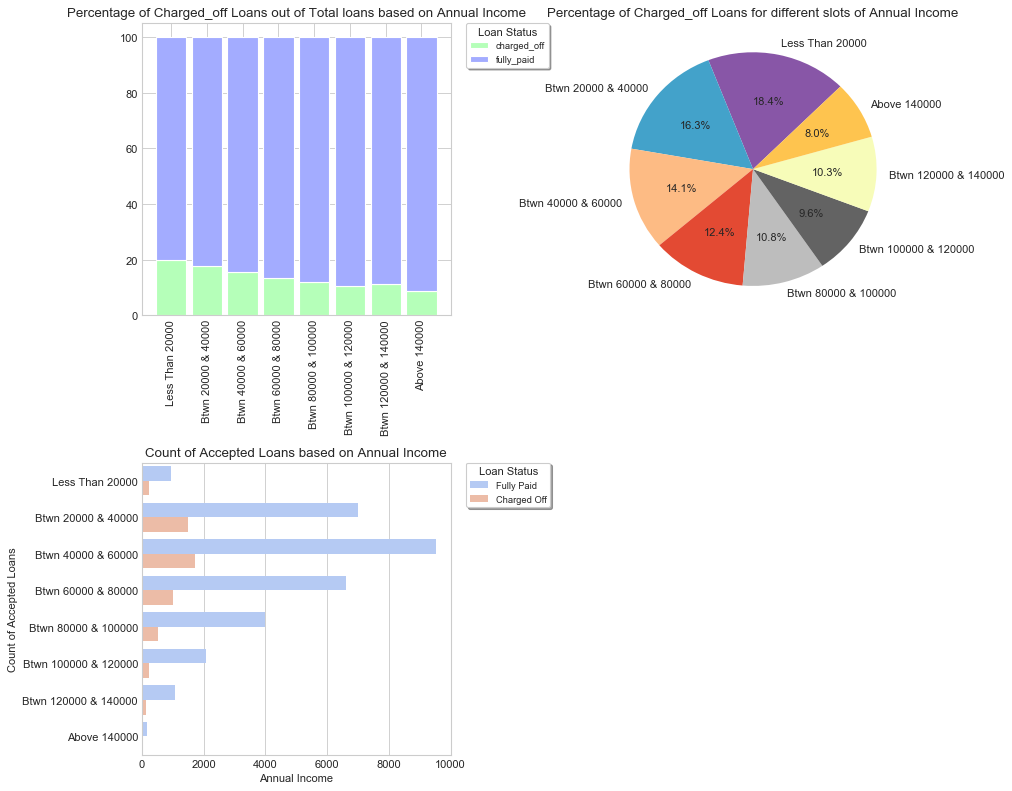

In [458]:
# From raw value to percentage
r = list(loan_inc.index)
totals = [i+j for i,j in zip(loan_inc['charged_off'], loan_inc['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_inc['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_inc['fully_paid'], totals)]
names = list(loan_inc['inc_slot'])

# plot
# adjust figure size
plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 2, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans based on Annual Income")

# subplot 2: pie chart
plt.subplot(2, 2, 2)
pal = ["#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
plt.pie(charged_off, labels=names, startangle=45, colors = pal, autopct='%.1f%%')
plt.title("Percentage of Charged_off Loans for different slots of Annual Income")

# subplot 3: bar graph
plt.subplot(2, 2, 3)
sns.countplot(y='inc_slot', hue ='loan_status', palette='coolwarm', data=loan_df)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Annual Income')
plt.ylabel('Count of Accepted Loans')
plt.title("Count of Accepted Loans based on Annual Income")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> The percentage of Charged off loans decreases more or less with the increase in annual income of the borrower. </font>
 -  <font color = blue> Most no of charged off loans can be seen for borrowers with annual income between 40K-60K followed by 20K-40K </font>

### *** Bivariate & Multivariate Analysis *** ###


#### ** `Finding percentage of charged_off loans from total loans for various values of Home Ownership and EMI` ** ####

In [459]:
loan_home_and_emi = pd.DataFrame(loan.groupby(['home_ownership','emi_slot'])['charged_off','fully_paid'].sum().reset_index())
loan_home_and_emi['home and emi'] = loan_home_and_emi[['emi_slot', 'home_ownership']].apply(lambda x: ' & '.join(x), axis=1)
loan_home_and_emi['charged_off'].fillna(0, inplace=True)
loan_home_and_emi['fully_paid'].fillna(0, inplace=True)
loan_home_and_emi['charged_off'] = loan_home_and_emi['charged_off'].astype('int64')
loan_home_and_emi['fully_paid'] = loan_home_and_emi['fully_paid'].astype('int64')
loan_home_and_emi = loan_home_and_emi.loc[(loan_home_and_emi['charged_off']!=0)&(loan_home_and_emi['fully_paid']!=0)]
loan_home_and_emi

,home_ownership,emi_slot,charged_off,fully_paid,home and emi
0,MORTGAGE,Less Than 200,575,4289,Less Than 200 & MORTGAGE
1,MORTGAGE,Btwn 200 & 400,838,5622,Btwn 200 & 400 & MORTGAGE
2,MORTGAGE,Btwn 400 & 600,524,2759,Btwn 400 & 600 & MORTGAGE
3,MORTGAGE,Btwn 600 & 800,220,1234,Btwn 600 & 800 & MORTGAGE
4,MORTGAGE,Btwn 800 & 1000,153,644,Btwn 800 & 1000 & MORTGAGE
5,MORTGAGE,Btwn 1000 & 1200,11,105,Btwn 1000 & 1200 & MORTGAGE
6,MORTGAGE,Btwn 1200 & 1400,2,34,Btwn 1200 & 1400 & MORTGAGE
14,OTHER,Less Than 200,2,28,Less Than 200 & OTHER
15,OTHER,Btwn 200 & 400,5,24,Btwn 200 & 400 & OTHER
16,OTHER,Btwn 400 & 600,8,20,Btwn 400 & 600 & OTHER


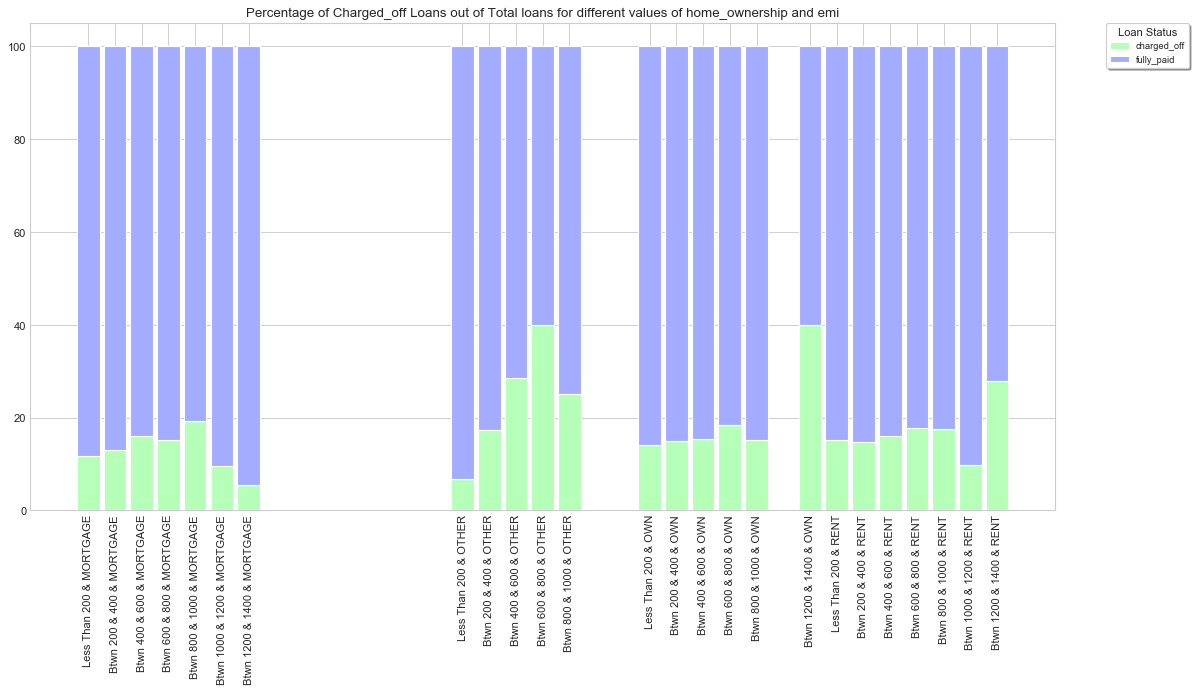

In [460]:
# From raw value to percentage
r = list(loan_home_and_emi.index)
totals = [i+j for i,j in zip(loan_home_and_emi['charged_off'], loan_home_and_emi['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_home_and_emi['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_home_and_emi['fully_paid'], totals)]
names = list(loan_home_and_emi['home and emi'])

# plot
# adjust figure size
plt.figure(figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different values of home_ownership and emi")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

 -  <font color = blue> The percentage of Charged off loans is highest for emi range of 400-600 and home_ownership='Other'
and emi range of 1200-1400 and home_ownership='Own'</font>

#### ** `Finding percentage of charged_off loans from total loans for various values of Home Ownership and Purpose` ** ####

In [461]:
loan_home_and_purpose = pd.DataFrame(loan.groupby(['home_ownership','purpose'])['charged_off','fully_paid'].sum().reset_index())
loan_home_and_purpose['home and purpose'] = loan_home_and_purpose[['purpose', 'home_ownership']].apply(lambda x: ' & '.join(x), axis=1)
loan_home_and_purpose['charged_off'].fillna(0, inplace=True)
loan_home_and_purpose['fully_paid'].fillna(0, inplace=True)
loan_home_and_purpose['charged_off'] = loan_home_and_purpose['charged_off'].astype('int64')
loan_home_and_purpose['fully_paid'] = loan_home_and_purpose['fully_paid'].astype('int64')
loan_home_and_purpose = loan_home_and_purpose.loc[(loan_home_and_purpose['charged_off']!=0)&(loan_home_and_purpose['fully_paid']!=0)]
loan_home_and_purpose

,home_ownership,purpose,charged_off,fully_paid,home and purpose
0,MORTGAGE,car,70,662,car & MORTGAGE
1,MORTGAGE,credit_card,233,1975,credit_card & MORTGAGE
2,MORTGAGE,debt_consolidation,1144,6322,debt_consolidation & MORTGAGE
3,MORTGAGE,educational,12,78,educational & MORTGAGE
4,MORTGAGE,home_improvement,264,2021,home_improvement & MORTGAGE
5,MORTGAGE,house,19,117,house & MORTGAGE
6,MORTGAGE,major_purchase,75,844,major_purchase & MORTGAGE
7,MORTGAGE,medical,42,253,medical & MORTGAGE
8,MORTGAGE,moving,8,100,moving & MORTGAGE
9,MORTGAGE,other,187,1217,other & MORTGAGE


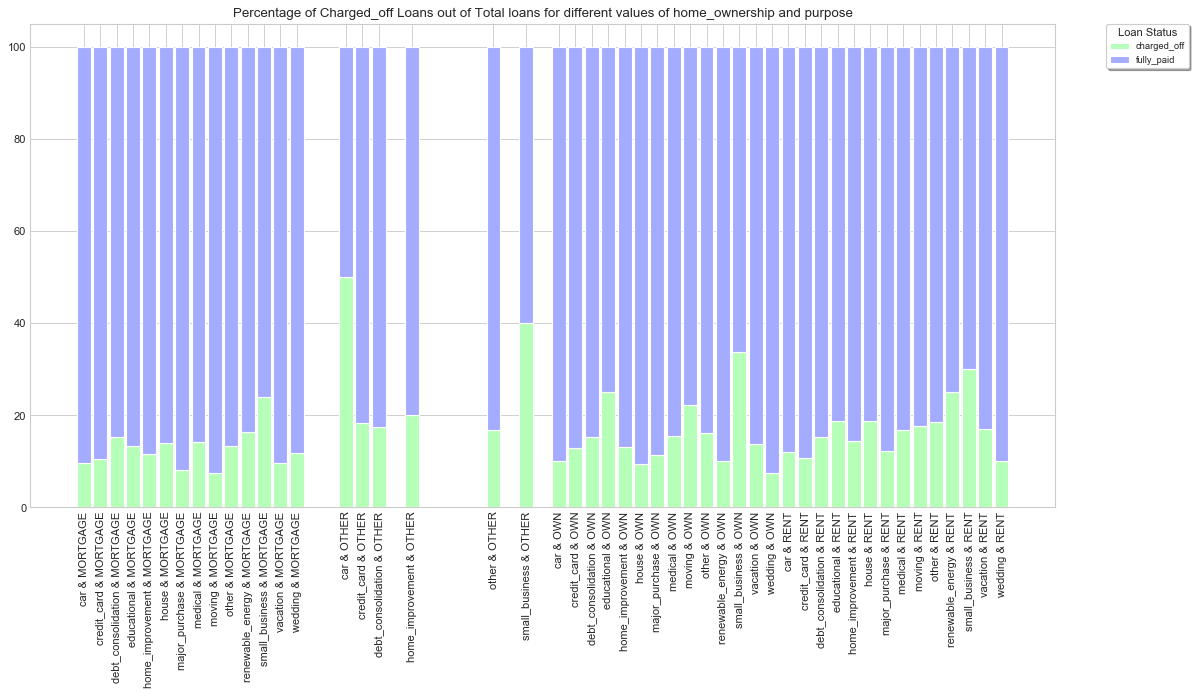

In [462]:
# From raw value to percentage
r = list(loan_home_and_purpose.index)
totals = [i+j for i,j in zip(loan_home_and_purpose['charged_off'], loan_home_and_purpose['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_home_and_purpose['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_home_and_purpose['fully_paid'], totals)]
names = list(loan_home_and_purpose['home and purpose'])

# plot
# adjust figure size
plt.figure(figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different values of home_ownership and purpose")

# Show graphic
plt.tight_layout()
plt.show()


####  The above graphs offer the following insights

The percentage of Charged off loans is highest for the below categories in descending order 
-  <font color = blue> loan_purpose='car' and home_ownership='Other' </font> 
-  <font color = blue> loan_purpose='small_business' and home_ownership='Other' </font>   
-  <font color = blue> loan_purpose='small_business' and home_ownership='Own' </font>  

#### ** `Finding count of charged_off loans for various values of Home Ownership in Different States` ** ####

In [463]:
loan_charged = loan.loc[loan['loan_status']=='Charged Off']
loan_state_home = pd.DataFrame(loan_charged.groupby(['addr_state','home_ownership'])['id'].count().reset_index())
loan_state_home['home in state'] = loan_state_home[['home_ownership','addr_state']].apply(lambda x: ' in '.join(x), axis=1)
loan_state_home.head()

,addr_state,home_ownership,id,home in state
0,AK,MORTGAGE,9,MORTGAGE in AK
1,AK,OWN,1,OWN in AK
2,AK,RENT,5,RENT in AK
3,AL,MORTGAGE,27,MORTGAGE in AL
4,AL,OWN,10,OWN in AL


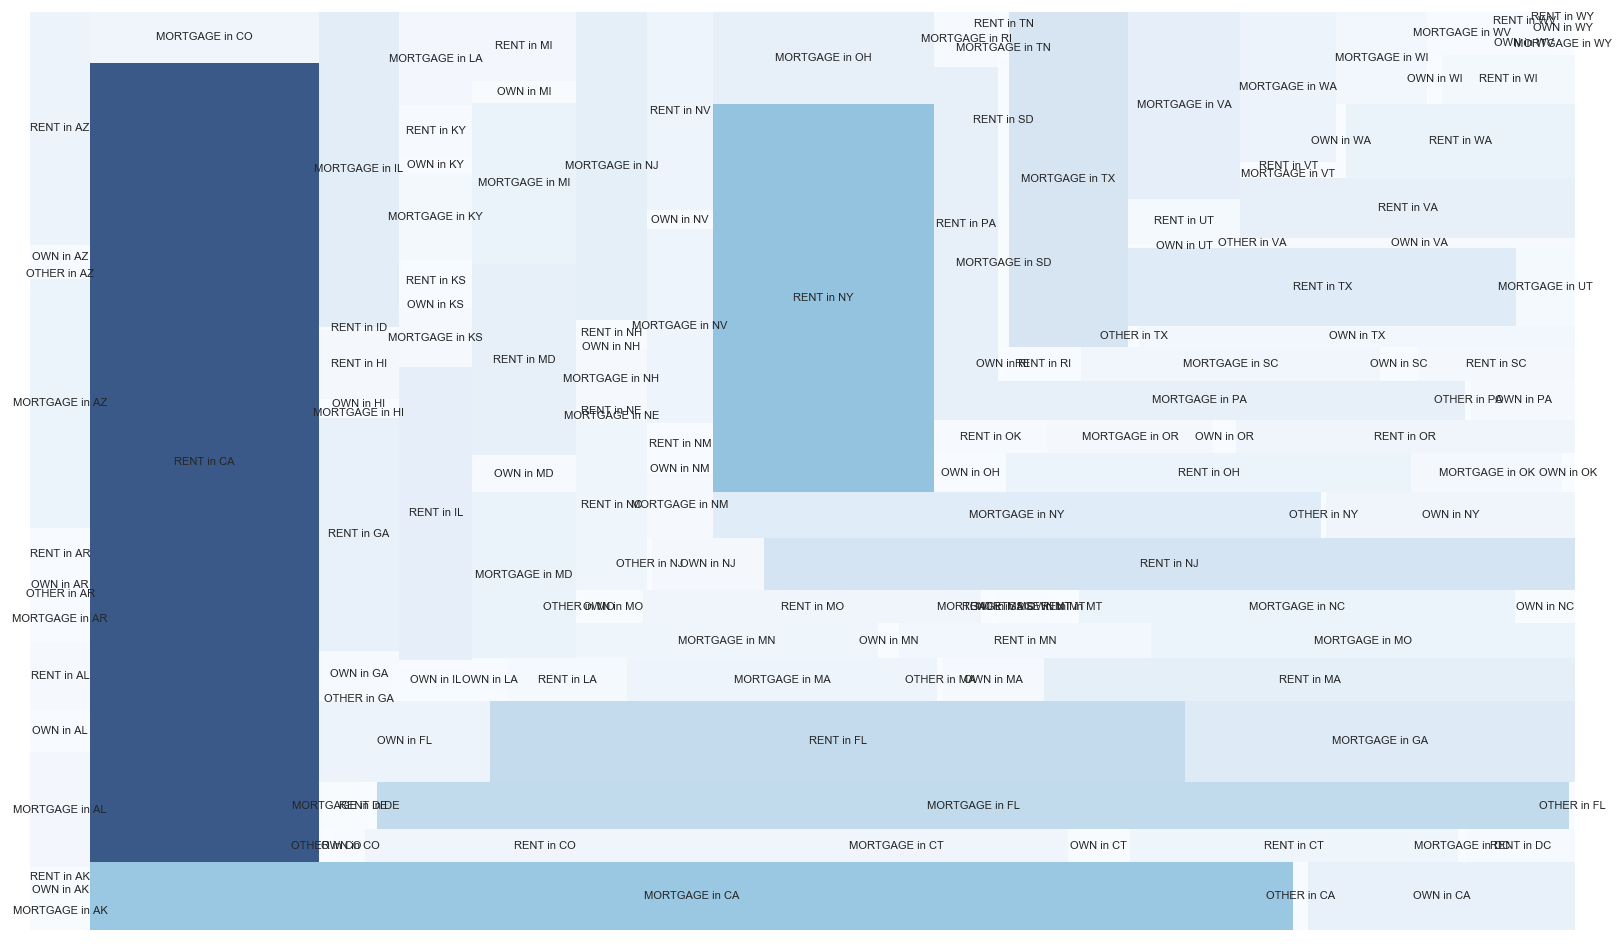

In [464]:
# Create a dataset:
my_values=list(loan_state_home['id'])
 
plt.figure(figsize=(20,12), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=.8, label=loan_state_home['home in state'],color=colors )
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()

####  The above graphs offer the following insights

The Count of Charged off loans is highest for the below categories in descending order 
-  <font color = blue> Borrowers with Rented homes in CA  </font> 
-  <font color = blue> Borrowers with Rented homes in NY </font>   
-  <font color = blue> Borrowers with Mortgaged homes in CA </font>  

#### ** `Finding percentage of charged_off loans from total loans for various values Loan Grades and Subgrades` ** ####

In [465]:
loan_grade_and_subgrade = pd.DataFrame(loan.groupby(['grade','sub_grade'])['charged_off','fully_paid'].sum().reset_index())
loan_grade_and_subgrade['grade and subgrade'] = loan_grade_and_subgrade[['grade', 'sub_grade']].apply(lambda x: ' - '.join(x), axis=1)
loan_grade_and_subgrade['charged_off'].fillna(0, inplace=True)
loan_grade_and_subgrade['fully_paid'].fillna(0, inplace=True)
loan_grade_and_subgrade['charged_off'] = loan_grade_and_subgrade['charged_off'].astype('int64')
loan_grade_and_subgrade['fully_paid'] = loan_grade_and_subgrade['fully_paid'].astype('int64')
loan_grade_and_subgrade = loan_grade_and_subgrade.loc[(loan_grade_and_subgrade['charged_off']!=0)&(loan_grade_and_subgrade['fully_paid']!=0)]
loan_grade_and_subgrade

,grade,sub_grade,charged_off,fully_paid,grade and subgrade
0,A,A1,30,1109,A - A1
1,A,A2,74,1434,A - A2
2,A,A3,103,1707,A - A3
3,A,A4,178,2695,A - A4
4,A,A5,217,2498,A - A5
5,B,B1,171,1626,B - B1
6,B,B2,228,1773,B - B2
7,B,B3,341,2484,B - B3
8,B,B4,329,2107,B - B4
9,B,B5,356,2259,B - B5


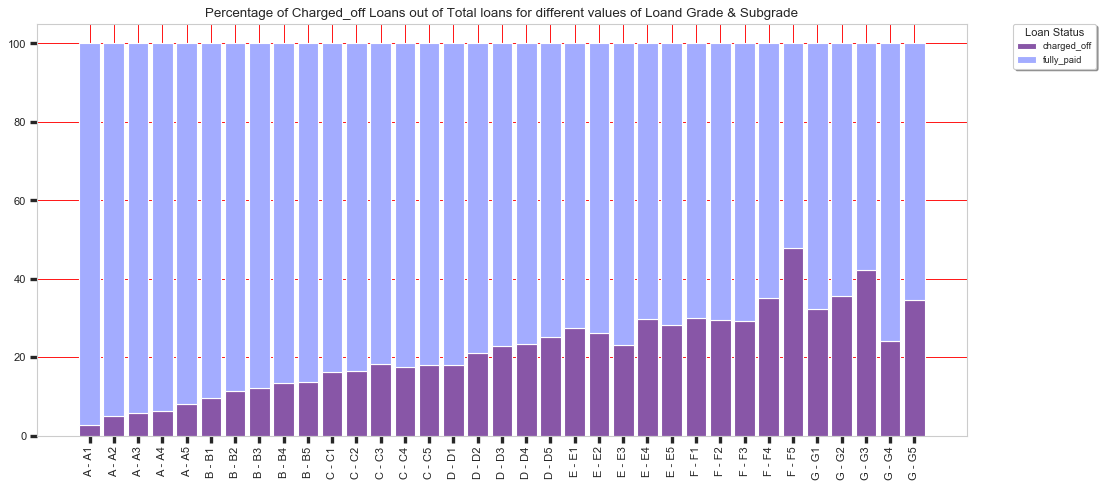

In [466]:
# From raw value to percentage
r = list(loan_grade_and_subgrade.index)
totals = [i+j for i,j in zip(loan_grade_and_subgrade['charged_off'], loan_grade_and_subgrade['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_grade_and_subgrade['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_grade_and_subgrade['fully_paid'], totals)]
names = list(loan_grade_and_subgrade['grade and subgrade'])

# plot
# adjust figure size
plt.figure(figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#8856a7', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical',fontsize='medium')
plt.tick_params(direction='out', length=6, width=3, grid_color='r',grid_alpha=1)
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different values of Loand Grade & Subgrade", fontsize='large')

# Show graphic
plt.show()


####  The above graphs offer the following insights

-  <font color = blue> The percentage of Charged off loans have a more or less gradual increase across Loan Grade and Sub-grade from A1 to G5.  </font> 

#### ** `Finding percentage of charged_off loans from total loans for various Loan Purposes and Verification Status` ** ####

In [467]:
loan_purpose_and_vs = pd.DataFrame(loan.groupby(['purpose','verification_status'])['charged_off','fully_paid'].sum().reset_index())
loan_purpose_and_vs['purpose and verification'] = loan_purpose_and_vs[['purpose','verification_status']].apply(lambda x: ' loan - '.join(x), axis=1)
loan_purpose_and_vs['charged_off'].fillna(0, inplace=True)
loan_purpose_and_vs['fully_paid'].fillna(0, inplace=True)
loan_purpose_and_vs['charged_off'] = loan_purpose_and_vs['charged_off'].astype('int64')
loan_purpose_and_vs['fully_paid'] = loan_purpose_and_vs['fully_paid'].astype('int64')
loan_purpose_and_vs = loan_purpose_and_vs.loc[(loan_purpose_and_vs['charged_off']!=0)&(loan_purpose_and_vs['fully_paid']!=0)]
loan_purpose_and_vs.head()

,purpose,verification_status,charged_off,fully_paid,purpose and verification
0,car,Not Verified,67,722,car loan - Not Verified
1,car,Source Verified,51,392,car loan - Source Verified
2,car,Verified,41,224,car loan - Verified
3,credit_card,Not Verified,201,2042,credit_card loan - Not Verified
4,credit_card,Source Verified,137,1044,credit_card loan - Source Verified


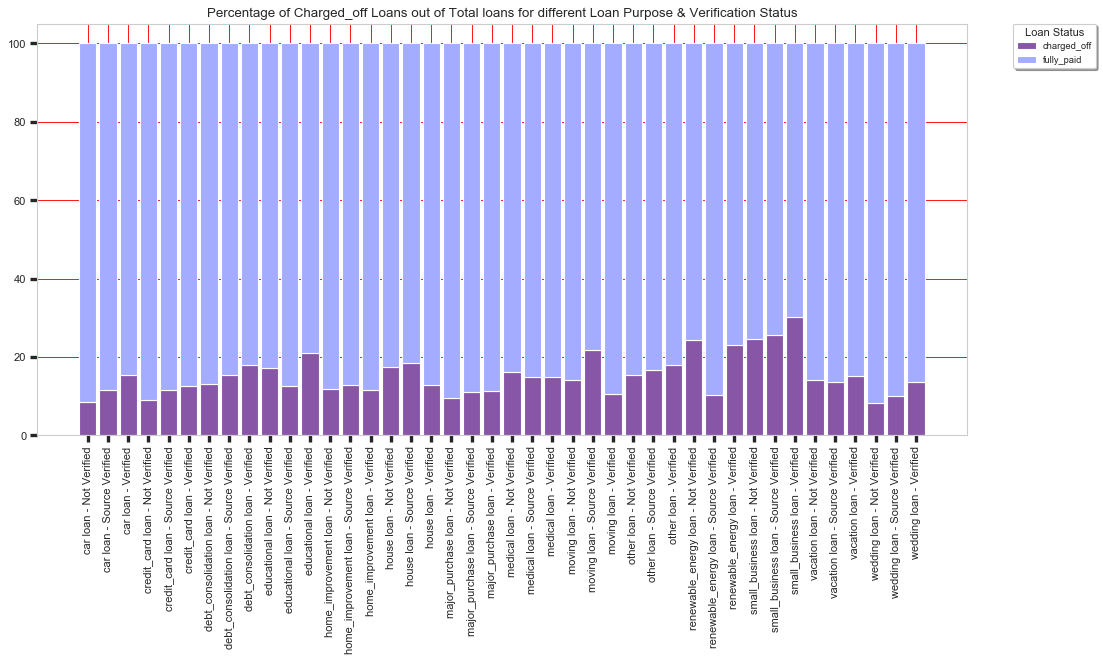

In [468]:
# From raw value to percentage
r = list(loan_purpose_and_vs.index)
totals = [i+j for i,j in zip(loan_purpose_and_vs['charged_off'], loan_purpose_and_vs['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_purpose_and_vs['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_purpose_and_vs['fully_paid'], totals)]
names = list(loan_purpose_and_vs['purpose and verification'])

# plot
# adjust figure size
plt.figure(figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#8856a7', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical',fontsize='medium')
plt.tick_params(direction='out', length=6, width=3, grid_color='r',grid_alpha=1)
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Loan Purpose & Verification Status", fontsize='large')

# Show graphic
plt.show()


####  The above graphs offer the following insights

-  <font color = blue> The percentage of Charged off loans is higher amongst small business loans across all values of verification status.  </font> 

#### ** `Finding percentage of charged_off loans from total loans for various Loan Purposes and Loan Terms` ** ####

In [469]:
loan_purpose_and_terms = pd.DataFrame(loan.groupby(['purpose','term'])['charged_off','fully_paid'].sum().reset_index())
loan_purpose_and_terms['purpose and term'] = loan_purpose_and_terms[['purpose','term']].apply(lambda x: ' loan - '.join(x), axis=1)
loan_purpose_and_terms['charged_off'].fillna(0, inplace=True)
loan_purpose_and_terms['fully_paid'].fillna(0, inplace=True)
loan_purpose_and_terms['charged_off'] = loan_purpose_and_terms['charged_off'].astype('int64')
loan_purpose_and_terms['fully_paid'] = loan_purpose_and_terms['fully_paid'].astype('int64')
loan_purpose_and_terms = loan_purpose_and_terms.loc[(loan_purpose_and_terms['charged_off']!=0)&(loan_purpose_and_terms['fully_paid']!=0)]
loan_purpose_and_terms.head()

,purpose,term,charged_off,fully_paid,purpose and term
0,car,36 months,81,905,car loan - 36 months
1,car,60 months,78,433,car loan - 60 months
2,credit_card,36 months,317,3772,credit_card loan - 36 months
3,credit_card,60 months,224,712,credit_card loan - 60 months
4,debt_consolidation,36 months,1465,11655,debt_consolidation loan - 36 months


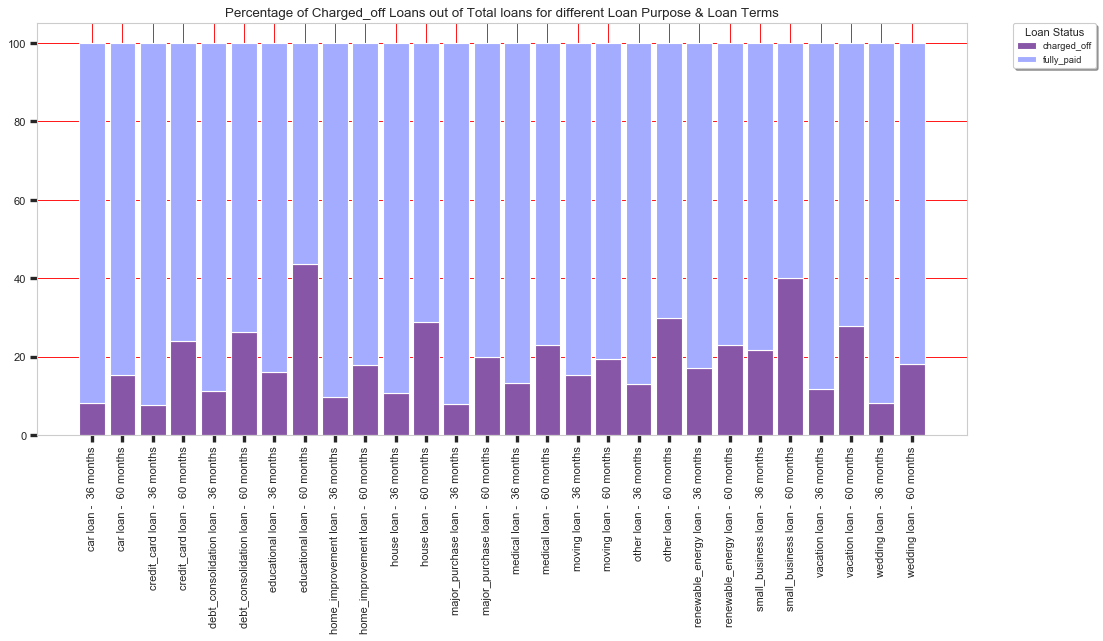

In [470]:
# From raw value to percentage
r = list(loan_purpose_and_terms.index)
totals = [i+j for i,j in zip(loan_purpose_and_terms['charged_off'], loan_purpose_and_terms['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_purpose_and_terms['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_purpose_and_terms['fully_paid'], totals)]
names = list(loan_purpose_and_terms['purpose and term'])

# plot
# adjust figure size
plt.figure(figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#8856a7', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical',fontsize='medium')
plt.tick_params(direction='out', length=6, width=3, grid_color='r',grid_alpha=1)
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Loan Purpose & Loan Terms", fontsize='large')

# Show graphic
plt.show()


####  The above graphs offer the following insights

-  <font color = blue> The percentage of Charged off loans is highest amongst educational loans for 60 months followed by small business loans for 60 months  </font> 

#### ** `Finding percentage of charged_off loans from total loans for various Loan Grade and Loan Terms` ** ####

In [471]:
loan_grade_and_terms = pd.DataFrame(loan.groupby(['grade','term'])['charged_off','fully_paid'].sum().reset_index())
loan_grade_and_terms['grade and term'] = loan_grade_and_terms[['grade','term']].apply(lambda x: ' grade - '.join(x), axis=1)
loan_grade_and_terms['charged_off'].fillna(0, inplace=True)
loan_grade_and_terms['fully_paid'].fillna(0, inplace=True)
loan_grade_and_terms['charged_off'] = loan_grade_and_terms['charged_off'].astype('int64')
loan_grade_and_terms['fully_paid'] = loan_grade_and_terms['fully_paid'].astype('int64')
loan_grade_and_terms = loan_grade_and_terms.loc[(loan_grade_and_terms['charged_off']!=0)&(loan_grade_and_terms['fully_paid']!=0)]
loan_grade_and_terms.head()

,grade,term,charged_off,fully_paid,grade and term
0,A,36 months,565,9085,A grade - 36 months
1,A,60 months,37,358,A grade - 60 months
2,B,36 months,985,8345,B grade - 36 months
3,B,60 months,440,1904,B grade - 60 months
4,C,36 months,840,4895,C grade - 36 months


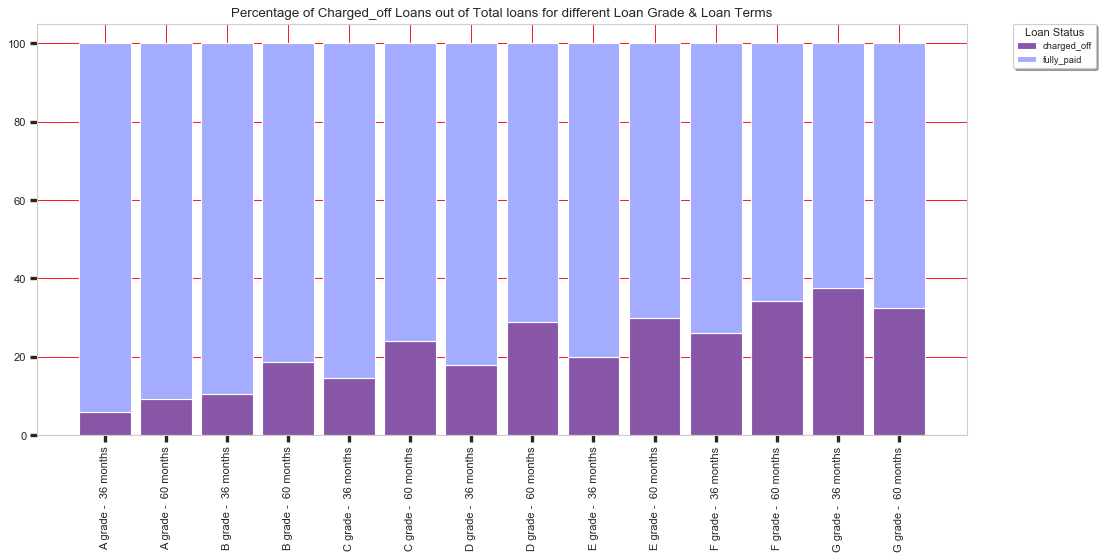

In [472]:
# From raw value to percentage
r = list(loan_grade_and_terms.index)
totals = [i+j for i,j in zip(loan_grade_and_terms['charged_off'], loan_grade_and_terms['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_grade_and_terms['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_grade_and_terms['fully_paid'], totals)]
names = list(loan_grade_and_terms['grade and term'])

# plot
# adjust figure size
plt.figure(figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#8856a7', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical',fontsize='medium')
plt.tick_params(direction='out', length=6, width=3, grid_color='r',grid_alpha=1)
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Loan Grade & Loan Terms", fontsize='large')

# Show graphic
plt.show()


####  The above graphs offer the following insights

-  <font color = blue> The percentage of Charged off loans increase across loan grade from A to G and within each grade, it is usually more for term = 60 months and lesser for term = 36 months.  </font> 

#### ** `Finding percentage of charged_off loans from total loans for various Loan Terms and revolve_utilization` ** ####

In [473]:
loan_grade_and_revol_util = pd.DataFrame(loan.groupby(['revol_util_slot','term'])['charged_off','fully_paid'].sum().reset_index())
loan_grade_and_revol_util['revol_util and term'] = loan_grade_and_revol_util[['revol_util_slot','term']].apply(lambda x: ' grade - '.join(x), axis=1)
loan_grade_and_revol_util['charged_off'].fillna(0, inplace=True)
loan_grade_and_revol_util['fully_paid'].fillna(0, inplace=True)
loan_grade_and_revol_util['charged_off'] = loan_grade_and_revol_util['charged_off'].astype('int64')
loan_grade_and_revol_util['fully_paid'] = loan_grade_and_revol_util['fully_paid'].astype('int64')
loan_grade_and_revol_util = loan_grade_and_revol_util.loc[(loan_grade_and_revol_util['charged_off']!=0)&(loan_grade_and_revol_util['fully_paid']!=0)]
loan_grade_and_revol_util.head()

,revol_util_slot,term,charged_off,fully_paid,revol_util and term
0,Btwn 0 & 10,36 months,282,3298,Btwn 0 & 10 grade - 36 months
1,Btwn 0 & 10,60 months,155,700,Btwn 0 & 10 grade - 60 months
2,Btwn 10 & 20,36 months,199,2439,Btwn 10 & 20 grade - 36 months
3,Btwn 10 & 20,60 months,134,553,Btwn 10 & 20 grade - 60 months
4,Btwn 20 & 30,36 months,241,2648,Btwn 20 & 30 grade - 36 months


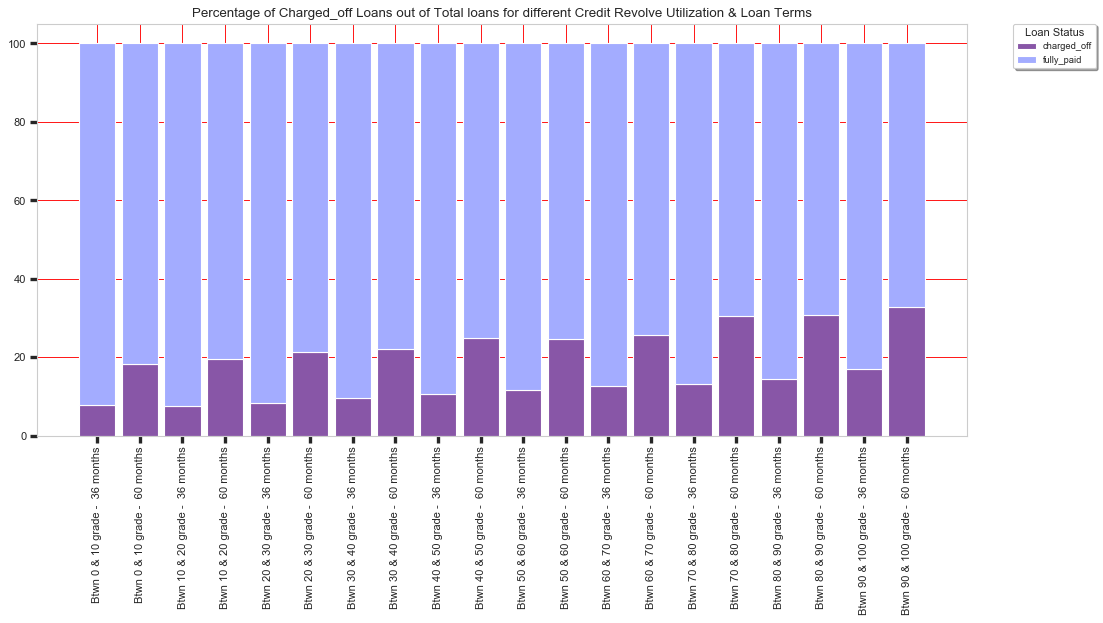

In [474]:
# From raw value to percentage
r = list(loan_grade_and_revol_util.index)
totals = [i+j for i,j in zip(loan_grade_and_revol_util['charged_off'], loan_grade_and_revol_util['fully_paid'])]
charged_off = [i / j * 100 for i,j in zip(loan_grade_and_revol_util['charged_off'], totals)]
fully_paid = [i / j * 100 for i,j in zip(loan_grade_and_revol_util['fully_paid'], totals)]
names = list(loan_grade_and_revol_util['revol_util and term'])

# plot
# adjust figure size
plt.figure(figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: stacked bar
plt.subplot(2, 1, 1)
barWidth = 0.85
# Create charged_off Bars
plt.bar(r, charged_off, color='#8856a7', edgecolor='white', width=barWidth)
# Create fully paid Bars
plt.bar(r, fully_paid, bottom=[i for i in charged_off], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical',fontsize='medium')
plt.tick_params(direction='out', length=6, width=3, grid_color='r',grid_alpha=1)
plt.legend(['charged_off','fully_paid'],frameon=True, fontsize='small', shadow='True', title='Loan Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Charged_off Loans out of Total loans for different Credit Revolve Utilization & Loan Terms", fontsize='large')

# Show graphic
plt.show()


####  The above graphs offer the following insights

-  <font color = blue> The percentage of Charged off loans increase with Credit revolve utization and within revol_util value, it is usually double for term = 60 months than for term = 36 months.  </font> 

#### ** `Finding relationship between annual income and loan amount for charged off loans` ** ####

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


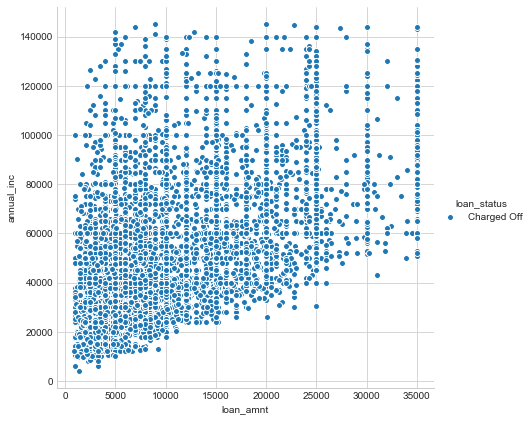

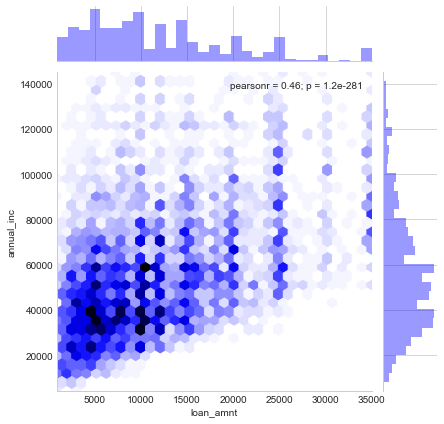

In [475]:
charged_off_loan_df = loan_df.loc[(loan_df['loan_status']=='Charged Off')]

sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=charged_off_loan_df, hue="loan_status", size=6)

sns.jointplot(charged_off_loan_df['loan_amnt'], charged_off_loan_df['annual_inc'], kind="hex", color="b")

plt.show()

####  The above graphs offer the following insights

-  <font color = blue> For Charged off loans correlation coefficient between borrower's Annual Income and Loan amount is 0.46.  </font> 
-  <font color = blue> As Annual income increase, loan amount also tends to increase whereas most of the observations are concentrated where annual income is between 30000 - 60000 and loan amount is below 13000  </font> 

#### ** `Finding relationship between annual income and revolving balance for charged off loans` ** ####

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


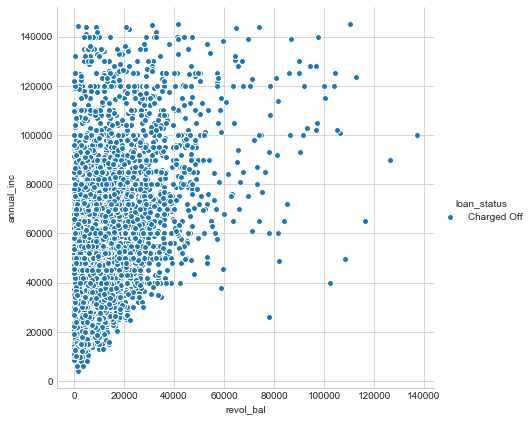

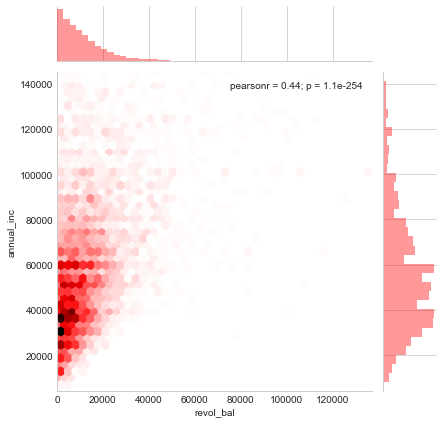

In [476]:
charged_off_loan_df = loan_df.loc[(loan_df['loan_status']=='Charged Off')]

sns.pairplot(x_vars=["revol_bal"], y_vars=["annual_inc"], data=charged_off_loan_df, hue="loan_status", size=6)

sns.jointplot(charged_off_loan_df['revol_bal'], charged_off_loan_df['annual_inc'], kind="hex", color="r")

plt.show()

####  The above graphs offer the following insights

-  <font color = blue> For Charged off loans correlation coefficient between borrower's Annual Income and Revolving balance is 0.44.  </font> 
-  <font color = blue> The frequency of Defaulted loans is most below an annual income of 60K when revolving balance is under 20K.  </font> 

#### ** `Trying to see if any strong correlation exists between the chief numeric variables of the dataset` ** ####

In [477]:
loan_new = loan_df.loc[(loan_df['loan_status']=='Charged Off'),['loan_amnt','funded_amnt', 'int_rate%', 'installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util%','total_acc','pub_rec_bankruptcies']]
loan_new.head()

,loan_amnt,funded_amnt,int_rate%,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util%,total_acc,pub_rec_bankruptcies
1,2500,2500,15.27,59.83,30000.0,1.00,3,0,1687,9.4,4,0.0
8,5600,5600,21.28,152.39,40000.0,5.55,11,0,5210,32.6,13,0.0
9,5375,5375,12.69,121.45,15000.0,18.08,2,0,9279,36.5,3,0.0
12,9000,9000,13.49,305.38,30000.0,10.08,4,0,10452,91.7,9,0.0
14,10000,10000,10.65,325.74,100000.0,7.06,14,0,11997,55.5,29,0.0


In [280]:
cor = loan_new.corr()
round(cor, 3)

,loan_amnt,funded_amnt,int_rate%,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util%,total_acc,pub_rec_bankruptcies
loan_amnt,1.000,0.980,0.344,0.927,0.460,0.077,0.180,-0.042,0.312,0.041,0.271,-0.022
funded_amnt,0.980,1.000,0.347,0.953,0.455,0.073,0.176,-0.047,0.298,0.045,0.261,-0.027
int_rate%,0.344,0.347,1.000,0.321,0.158,0.043,0.030,0.085,0.063,0.378,-0.024,0.080
installment,0.927,0.953,0.321,1.000,0.457,0.054,0.172,-0.036,0.296,0.073,0.235,-0.019
annual_inc,0.460,0.455,0.158,0.457,1.000,-0.030,0.297,0.021,0.440,0.090,0.384,0.027
dti,0.077,0.073,0.043,0.054,-0.030,1.000,0.307,0.007,0.267,0.231,0.283,0.018
open_acc,0.180,0.176,0.030,0.172,0.297,0.307,1.000,0.056,0.322,-0.064,0.682,0.068
pub_rec,-0.042,-0.047,0.085,-0.036,0.021,0.007,0.056,1.000,-0.057,0.059,0.022,0.864
revol_bal,0.312,0.298,0.063,0.296,0.440,0.267,0.322,-0.057,1.000,0.300,0.353,-0.043
revol_util%,0.041,0.045,0.378,0.073,0.090,0.231,-0.064,0.059,0.300,1.000,-0.031,0.066


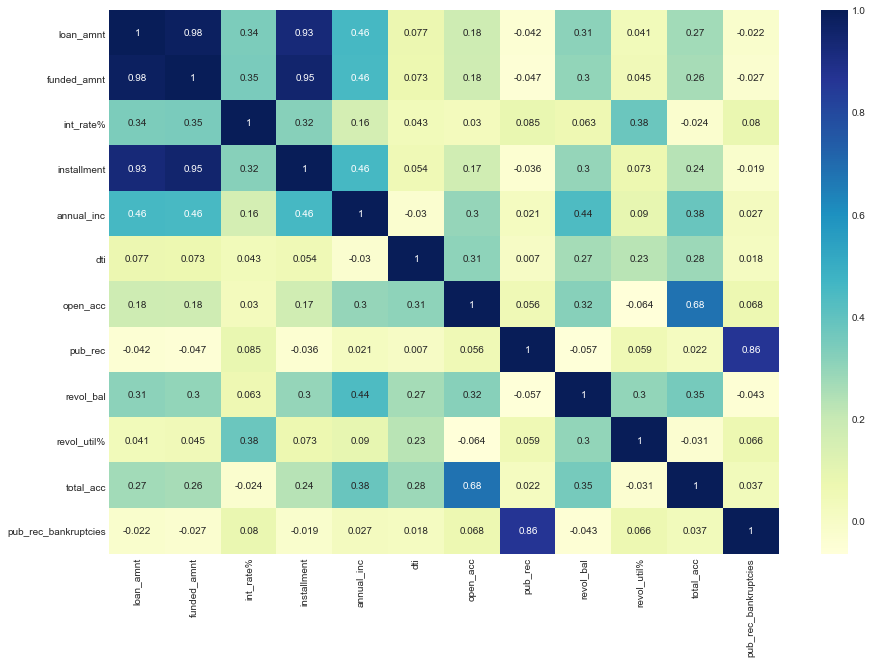

In [281]:
# figure size
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

•   From the above heatmap, we do not see any significant correlation between sets of numeric variables from the dataset.

## *** Conclusion *** ##

### About 1/7th of all accepted loans are 'Charged off'. The rest are fully paid.
### The following can be considered as Driver variables while sactioning loans to ensure loans aren't charged-off (defaulted).  ###

#### Loan Purpose
 -  <font color = blue> Small business have highest % of charged off loans. </font>
 -  <font color = blue> Debt_consolidation has highest no of charged off loans. </font>

####  Loan Terms
 -  <font color = blue> Loans with term=60 have more than double the the percentage of being charged off than those with term=36. </font>
 -  <font color = blue> There are more number of loans with term=36 that have become charged off than those with term=60. </font>
 
####  Loan Grade/Sub-grade & Rate of Interest

    Grade/Sub-grade & Rate of Interest are interdependent on each other.

 -  <font color = blue> Percentage of Charged off loans have a more or less gradual increase across Grade/Sub-grade(from A to G) & Rate of Interest(low to high). </font>
 -  <font color = blue> The percentage is highest for subgrade F5 followed by G3 and G5 and lowest for A1 </font>
 -  <font color = blue> Most no of charged off loans have interest rate between 10 & 15. </font>
 
####  Address State

 -  <font color = blue> Percentage of charged off loans is highest in the state NE . </font>
 -  <font color = blue> The count of charged off loans is most in the state CA followed by NY, FL, TX and NJ. </font> 
 
####  Home Ownership

 -  <font color = blue> Most number of Charged-off loans happen for borrowers living in Rented homes or homes on Mortage </font>
 
####  Number of Derogatory Public Records

 -  <font color = blue> Percentage of charged off loans is highest for pub_rec value 1, followed by 2 and 0. </font> 
 
####  Number of Public Record Bankruptcies

 -  <font color = blue> Percentage of charged off loans gradually increase with increase in the value of Pub_rec_bankruptcies </font> 
 
####  Credit Revolving Utilization Rate

 -  <font color = blue> Percentage of charged off loans gradually increase with increase in the value of revol_util </font>
 
####  Open Credit Lines

-  <font color = blue> Count of charged off loans is highest when no of Open Credit Lines is between 5 & 10 </font>
 
####  Loan Amount

 -  <font color = blue> Distribution of Charged of loans is more between loan amount range 5000 and 17000. </font>
 -  <font color = blue> Frequency of Charged off loans decreases with increase in loan amount. </font> 
 
####  Annual Income

 -  <font color = blue> The percentage of Charged off loans decreases more or less with the increase in annual income of the borrower. </font>
 -  <font color = blue> Most no of charged off loans can be seen for borrowers with annual income between 40K-60K followed by 20K-40K </font>

####  Home Ownership and Loan Purpose

The percentage of Charged off loans is highest for the below categories in descending order 
-  <font color = blue> loan_purpose='car' and home_ownership='Other' </font> 
-  <font color = blue> loan_purpose='small_business' and home_ownership='Other' </font>   
-  <font color = blue> loan_purpose='small_business' and home_ownership='Own' </font>  

####  Home Ownership and State

The Count of Charged off loans is highest for the below categories in descending order 
-  <font color = blue> Borrowers with Rented homes in CA  </font> 
-  <font color = blue> Borrowers with Rented homes in NY </font>   
-  <font color = blue> Borrowers with Mortgaged homes in CA </font>   

####  Loan Amount and Annual Income

-  <font color = blue> For Charged off loans correlation coefficient between borrower's Annual Income and Loan amount is 0.46.  </font> 
-  <font color = blue> As Annual income increase, loan amount also tends to increase whereas most of the observations are concentrated where annual income is between 30000 - 60000 and loan amount is below 13000  </font> 

####  Loan Purpose and Loan Terms

-  <font color = blue> The percentage of Charged off loans is highest amongst educational loans for 60 months followed by small business loans for 60 months  </font> 

####  Loan Grade and Loan Terms

-  <font color = blue> The percentage of Charged off loans increases across loan grade from A to G and within each grade, it is usually more term = 60 months and lesser for term = 36 months.  </font> 